Data Analysis for overnight data (27.09.2018)
===============================================
Authored by: [Nathan Belmore](https://plasma.physics.berkeley.edu/faculty-staff/nathan-belmore) 

# Analysis
***



In [8]:
# creating the correct enviroment for analysis
import os
import re
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
from scipy.signal import argrelextrema, savgol_filter
import matplotlib.pyplot as plt

# Setting parameters to make plots clear for publication
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

### Importing the data

Some of the data sets contain multiple iterations, which are summed over to improve the statistics. 

In [2]:
# path to the data set
path = '27/'

# some data structure for genetrating a list of the files. 
files = []

for file in os.listdir(path):
    if file.endswith(".txt"):
        files.append(file)
files.sort()
print('Files imported:')

# Importing the data in a pandas dataframe
dfs = []
names=['time', 'ch1', 'ch2', 'ch3', 'ch4']
index = []

for num, fname in enumerate(files, start=1):
    print("File #{} | {}".format(num - 1, fname))
    if len(fname) > 0:
        pathname = os.path.join(path, fname)
        data = pd.read_table(pathname, index_col='time', sep='\t', names=names)
        dfs.append(data)
        index.append([int(s) for s in re.findall(r'\d+', fname)][-3:])

index = pd.DataFrame(index, columns=['eV', 'delay', 'iter'])
data = pd.Series(dfs)

Files imported:
File #0 | Scope_27.09.2018_23.36.15_20eV_delay_020_msec__0.txt
File #1 | Scope_27.09.2018_23.37.30_20eV_delay_020_msec__1.txt


/home/natephysics/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: read_table is deprecated, use read_csv instead.


File #2 | Scope_27.09.2018_23.38.45_20eV_delay_020_msec__2.txt
File #3 | Scope_27.09.2018_23.39.59_20eV_delay_020_msec__3.txt
File #4 | Scope_27.09.2018_23.41.14_20eV_delay_020_msec__4.txt
File #5 | Scope_27.09.2018_23.42.28_20eV_delay_020_msec__5.txt
File #6 | Scope_27.09.2018_23.43.43_20eV_delay_020_msec__6.txt
File #7 | Scope_27.09.2018_23.44.57_20eV_delay_020_msec__7.txt
File #8 | Scope_27.09.2018_23.46.12_20eV_delay_020_msec__8.txt
File #9 | Scope_27.09.2018_23.47.26_20eV_delay_020_msec__9.txt
File #10 | Scope_27.09.2018_23.48.41_20eV_delay_020_msec__10.txt
File #11 | Scope_27.09.2018_23.49.55_20eV_delay_020_msec__11.txt
File #12 | Scope_27.09.2018_23.51.10_20eV_delay_020_msec__12.txt
File #13 | Scope_27.09.2018_23.52.24_20eV_delay_020_msec__13.txt
File #14 | Scope_27.09.2018_23.53.39_20eV_delay_020_msec__14.txt
File #15 | Scope_27.09.2018_23.54.53_20eV_delay_020_msec__15.txt
File #16 | Scope_27.09.2018_23.56.09_20eV_delay_050_msec__0.txt
File #17 | Scope_27.09.2018_23.57.28_20eV_

In [4]:
delays = index['delay'].unique()

## Thresholding Method

First I'll define an object to contain the counts per data set. Then to get the counts per delay, I'll sum the data sets with the same delay. 

In [29]:
# Define a structure to hold the counts per data set.
T = []

# This is the integrated area value for 1 'peak'.
IntThres = 55

# Calculate the counts per data set.
for i in range(len(data)):
    T.append(np.sum(data[i]['ch3'][data[i]['ch3'] > th1])//IntThres)

T = pd.Series(T)
T[138] = 0 # This data set had a higher noise floor, which produced problems with this analysis.

# Define a strcutre to hold the counts per delay.
counts = []

# Calculate the counts vs. delay
for delay in index['delay'].unique():
    counts.append(np.sum(T[index['delay'] == delay]))

## Plotting the results

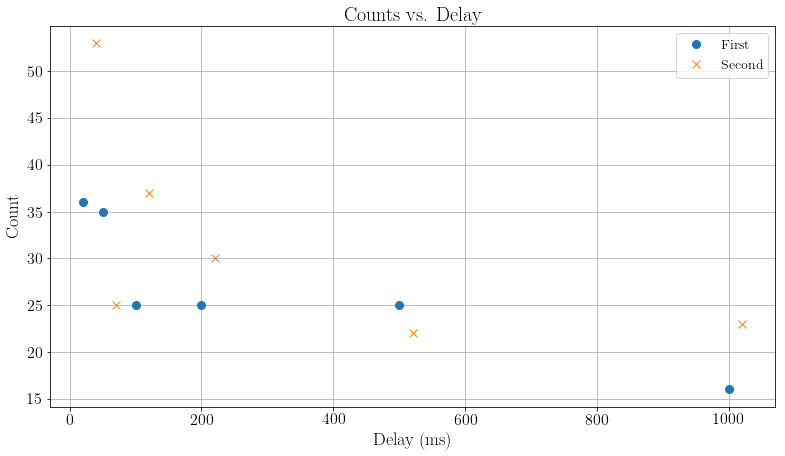

In [32]:
fig, ax = plt.subplots(figsize=(13, 7))

# Breaking the plot up into the first and second sweep
ax.plot(index['delay'].unique()[0:6], counts[0:6], 'o', label='First')
ax.plot(index['delay'].unique()[6:], counts[6:], 'x', label='Second')

ax.set_xlabel('Delay (ms)')
ax.set_ylabel('Count')
ax.set_title('Counts vs. Delay') 
ax.legend()
ax.grid(True)

plt.show()

## Verify

To verify the above plot I've plotted each data set, it's delay, and the recorded count from the analysis. This acts as a quick visual verification that the data is correct. While it's not perfect, for example data set 141 might be slightly above the threshold, it might only be off by 1 or 2 counts in the whole data set. 

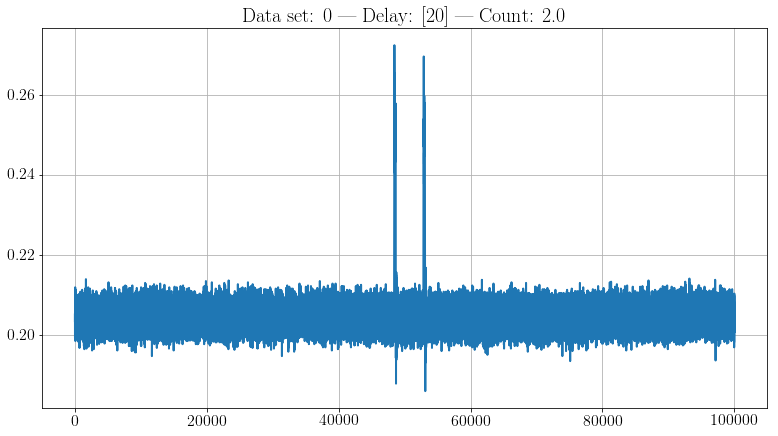

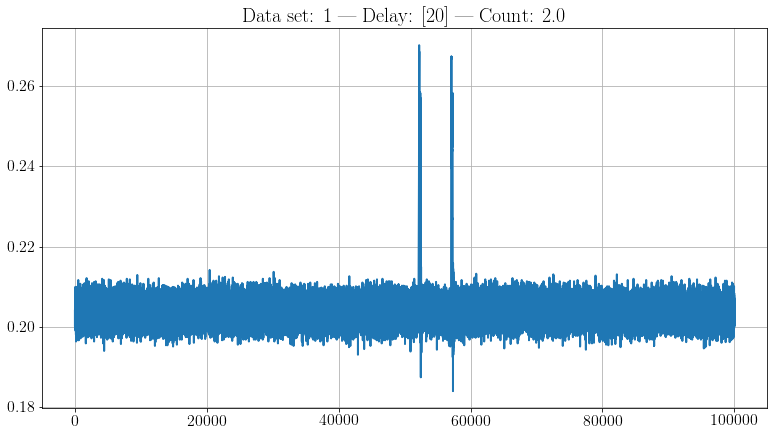

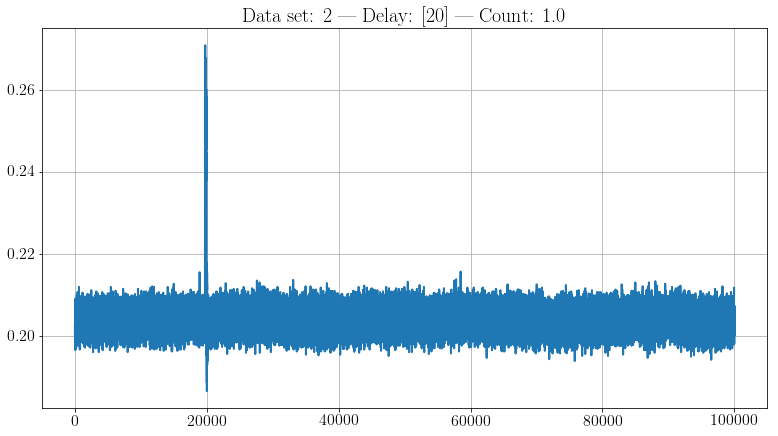

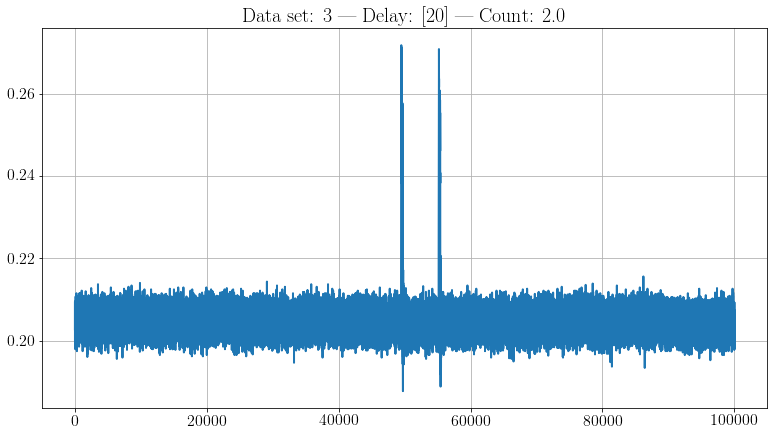

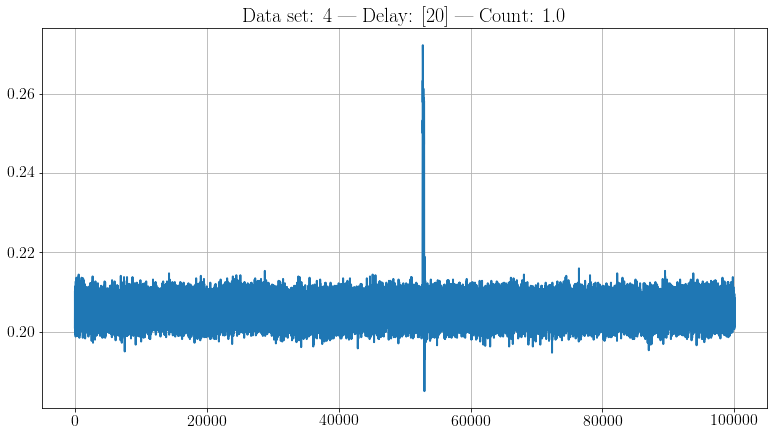

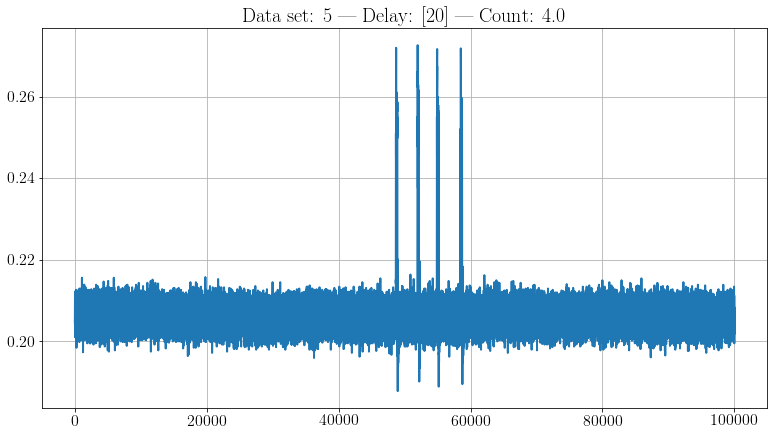

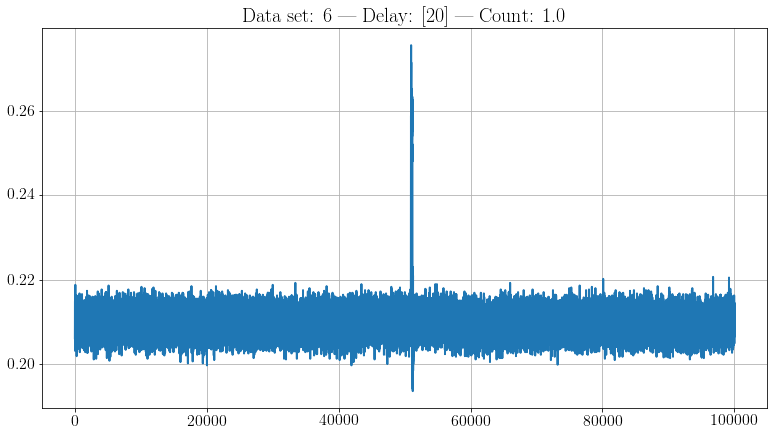

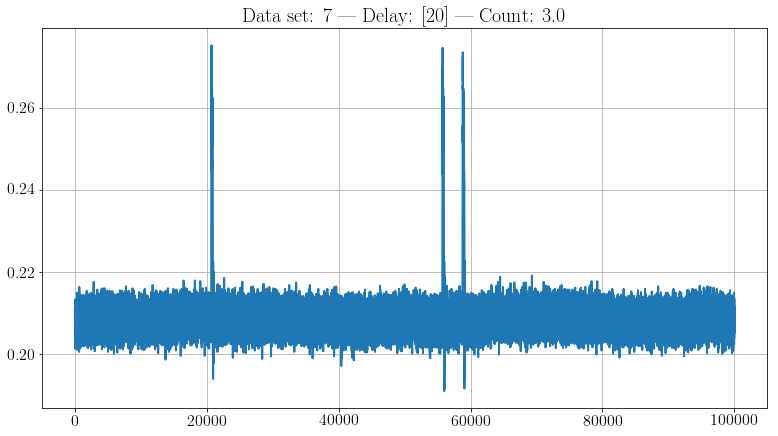

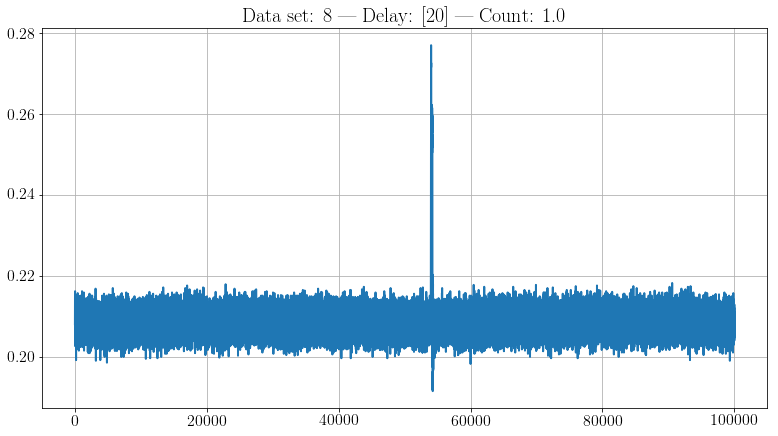

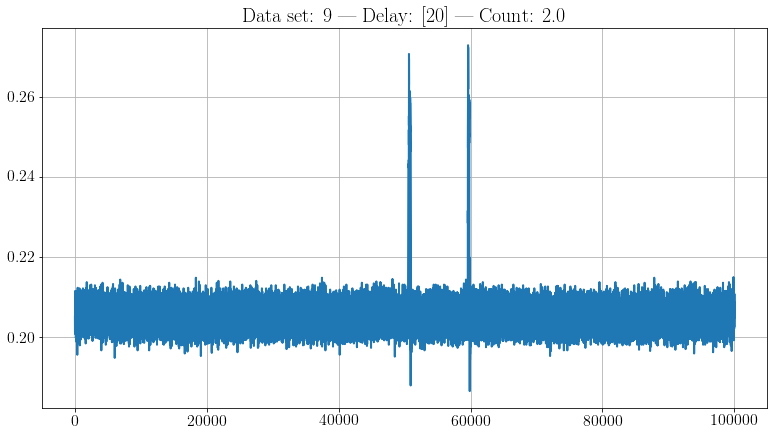

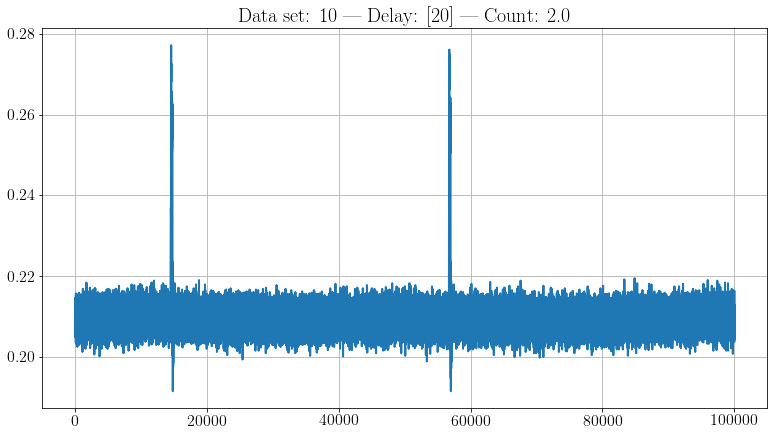

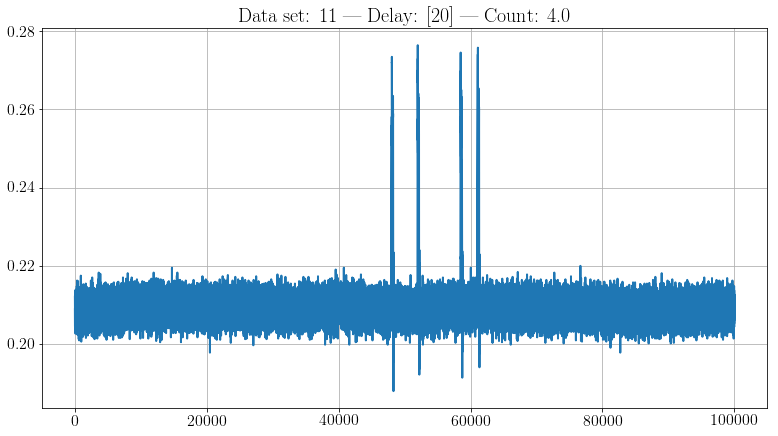

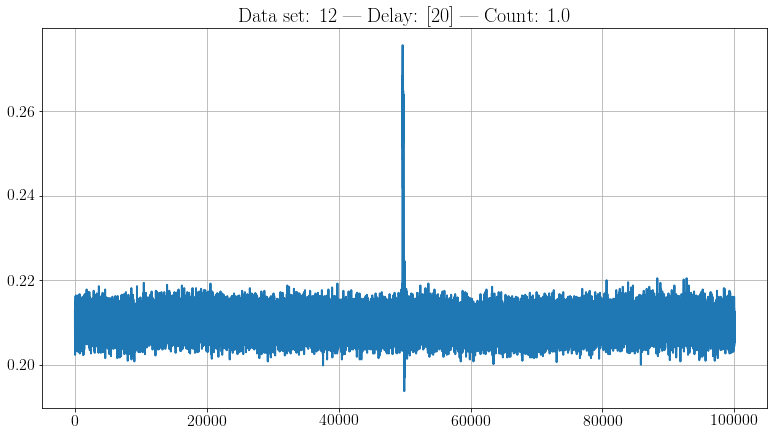

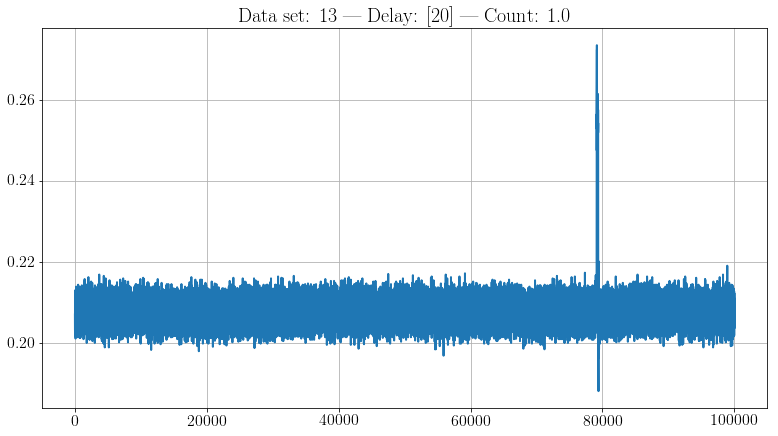

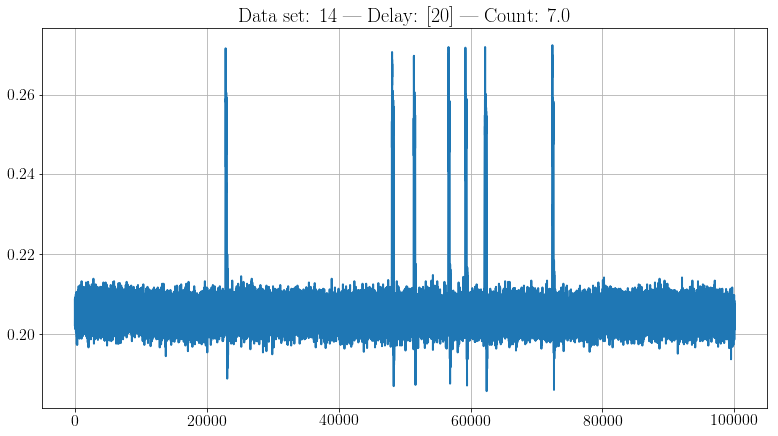

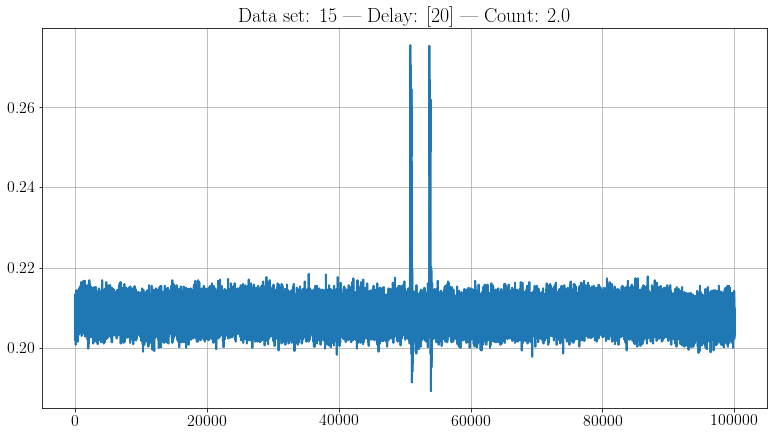

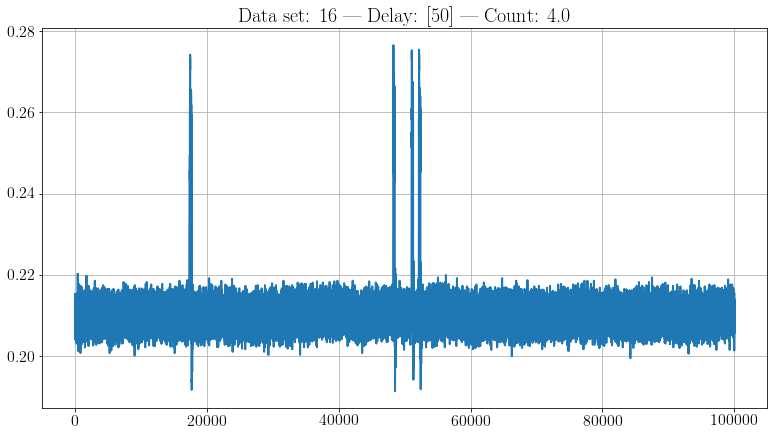

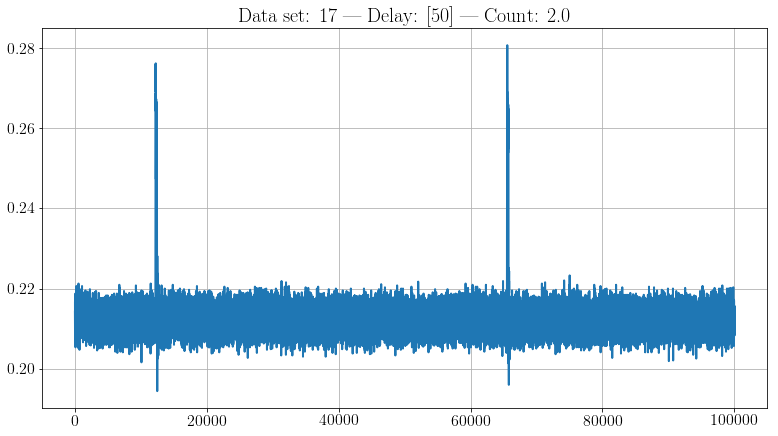

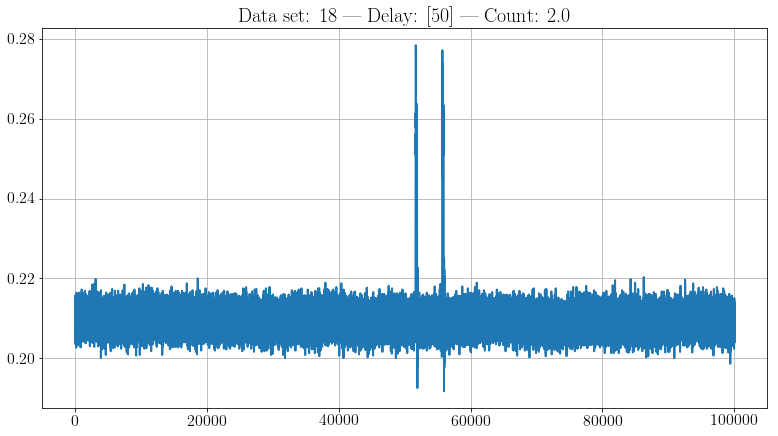

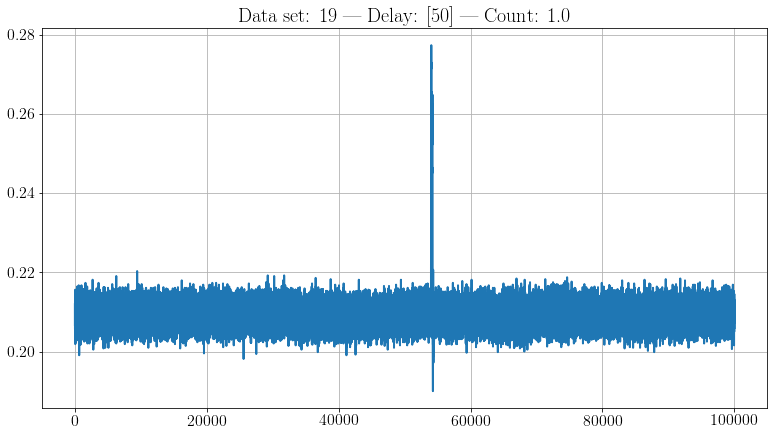

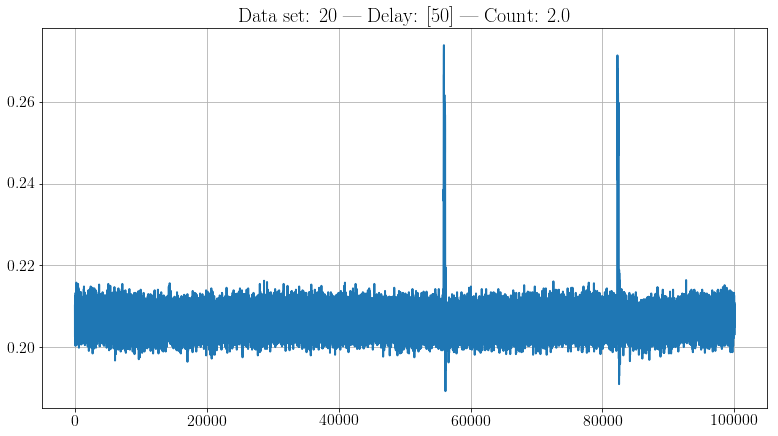

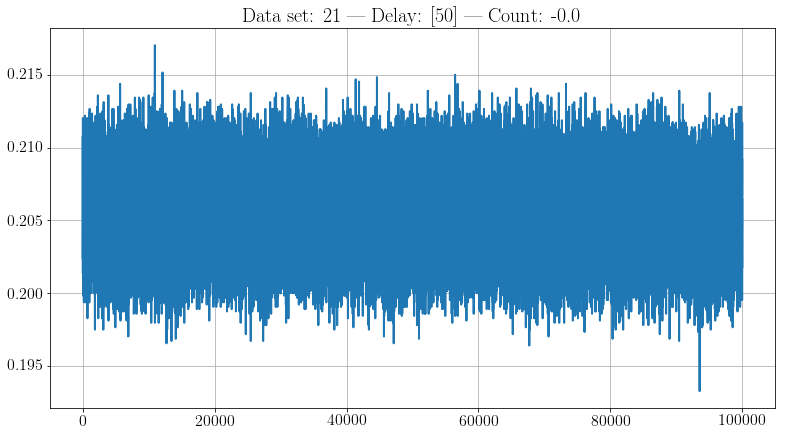

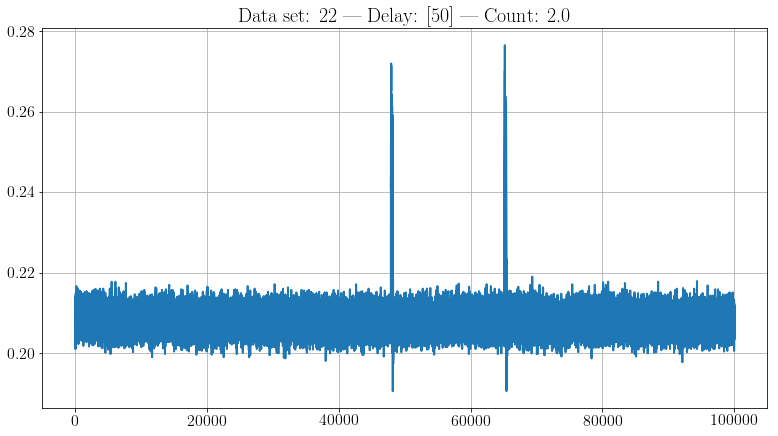

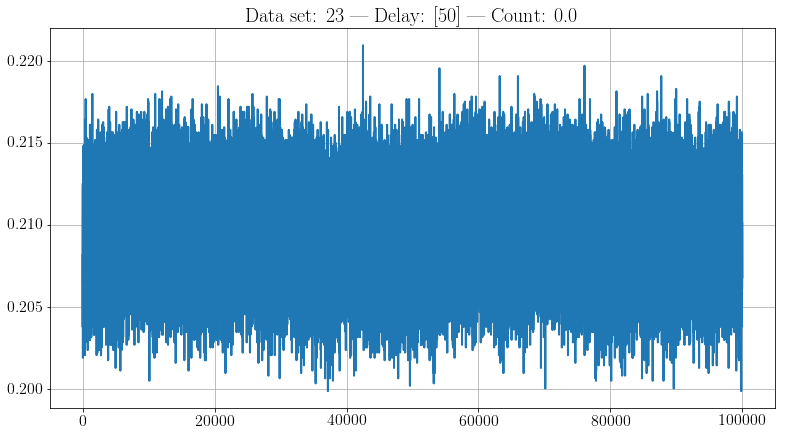

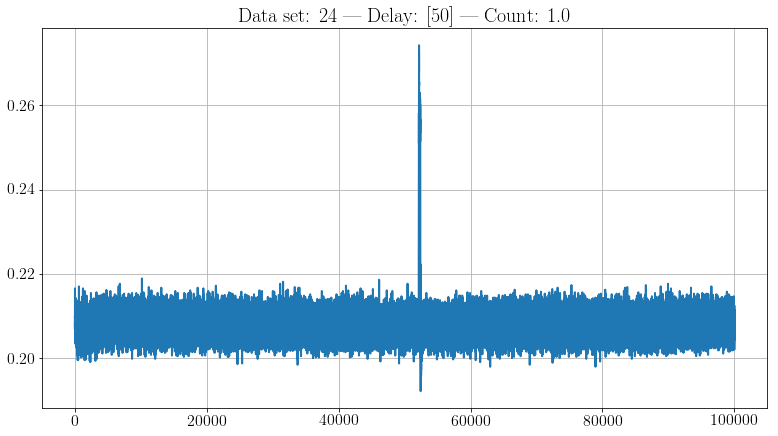

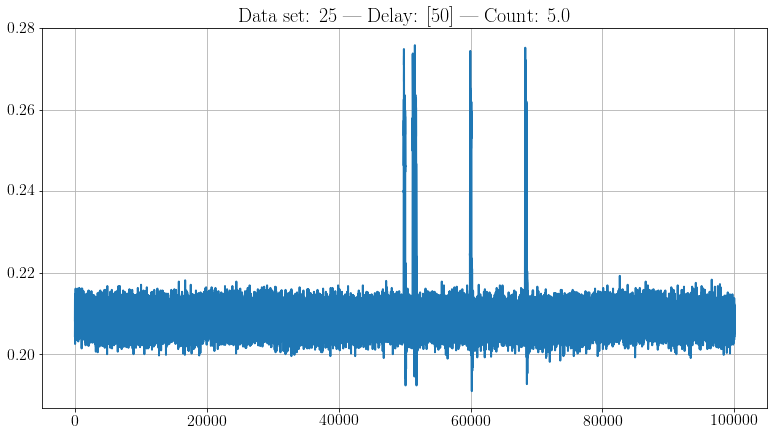

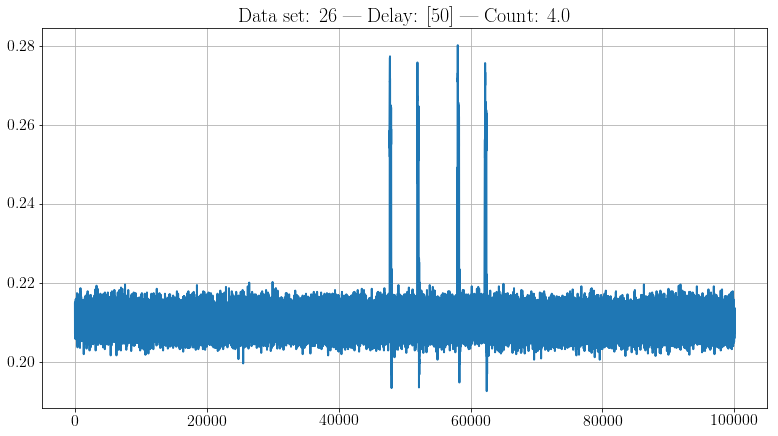

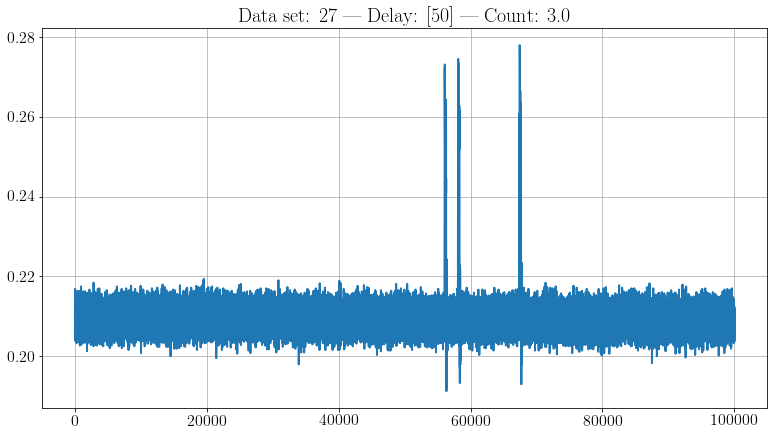

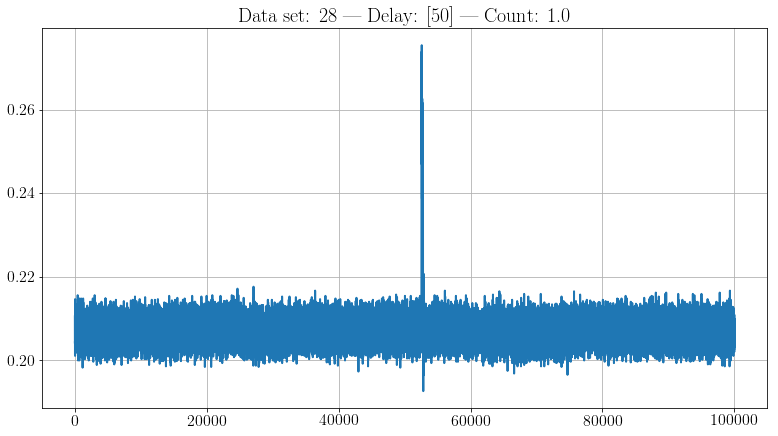

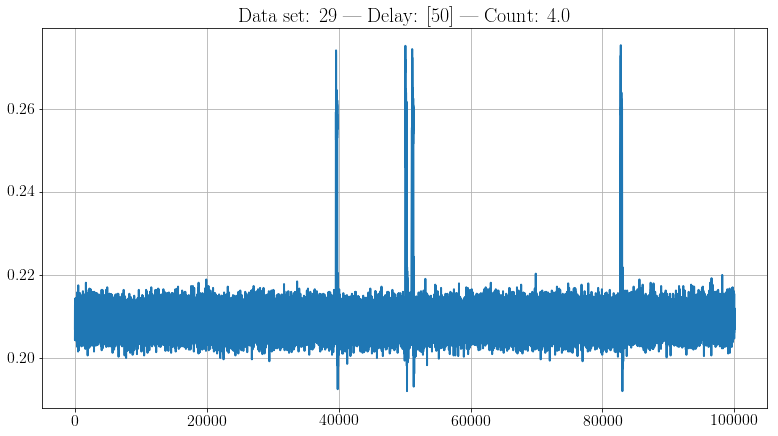

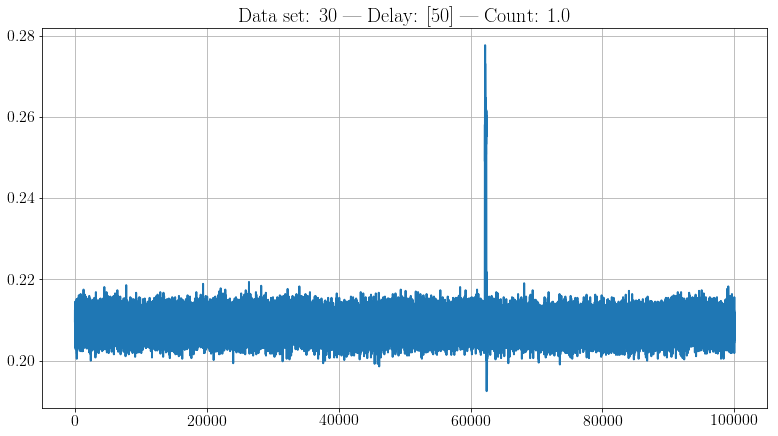

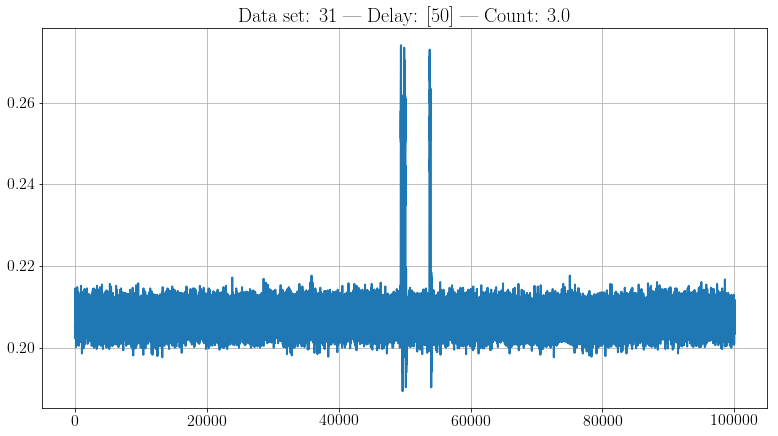

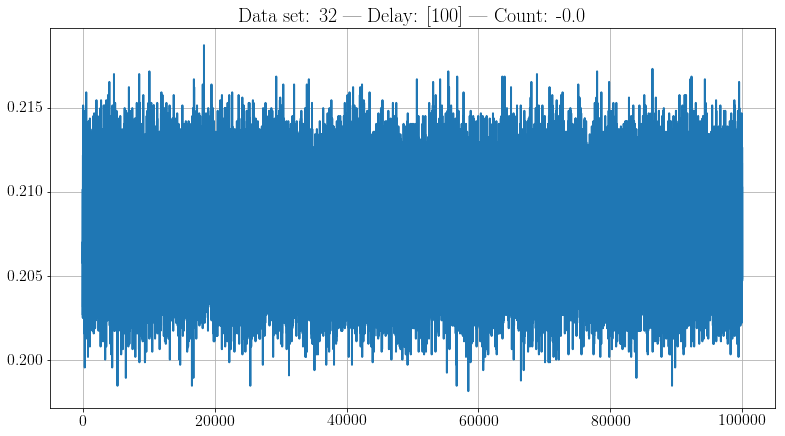

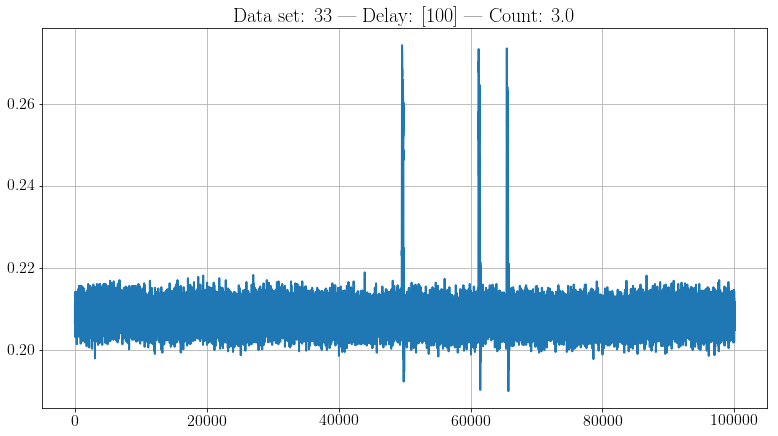

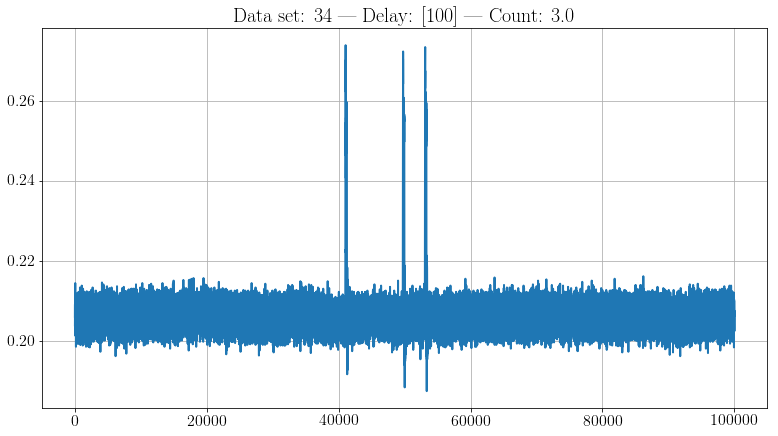

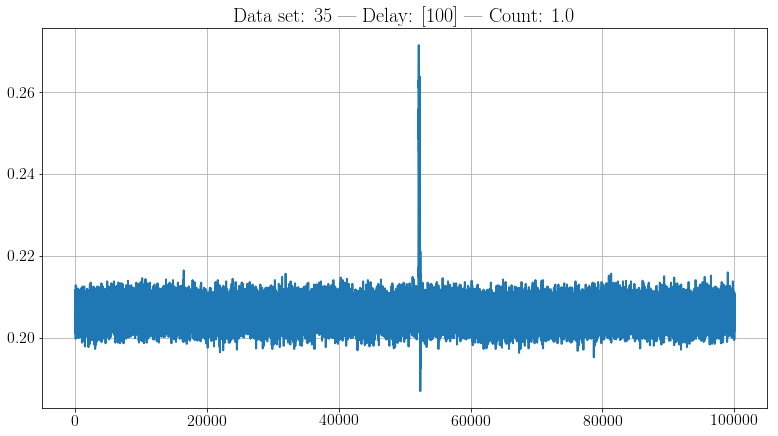

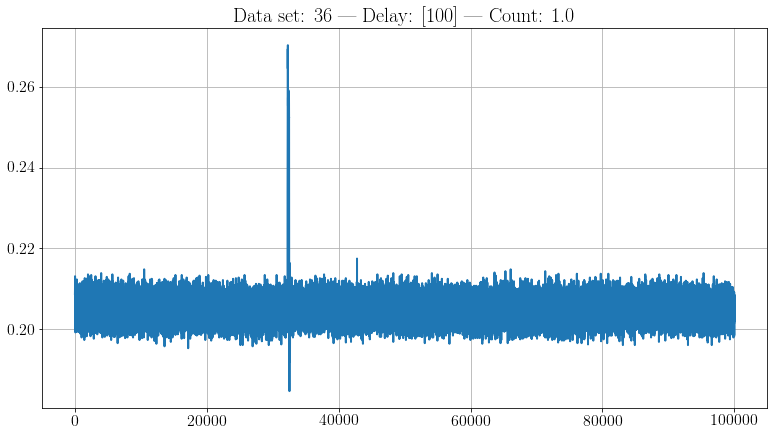

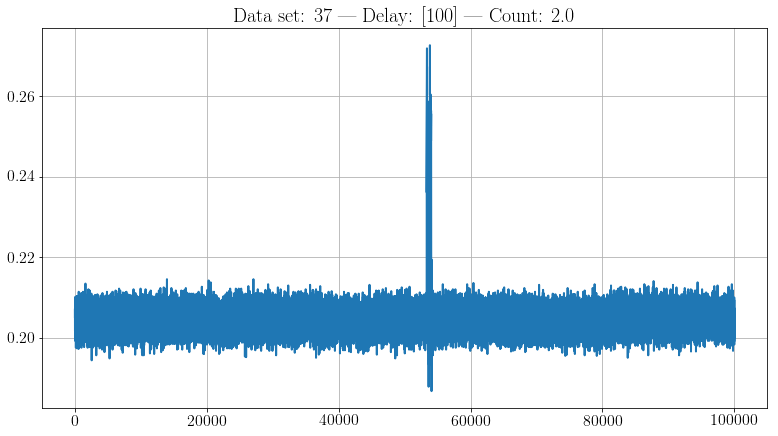

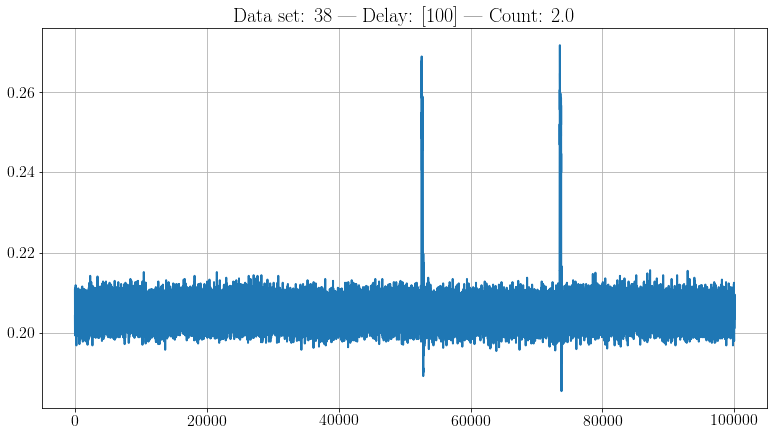

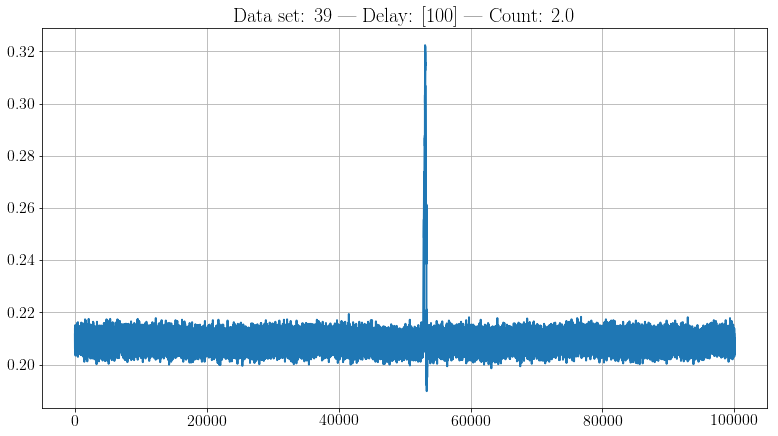

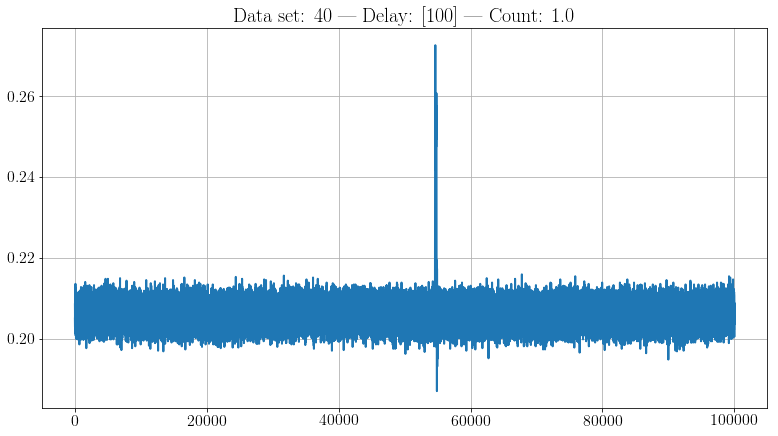

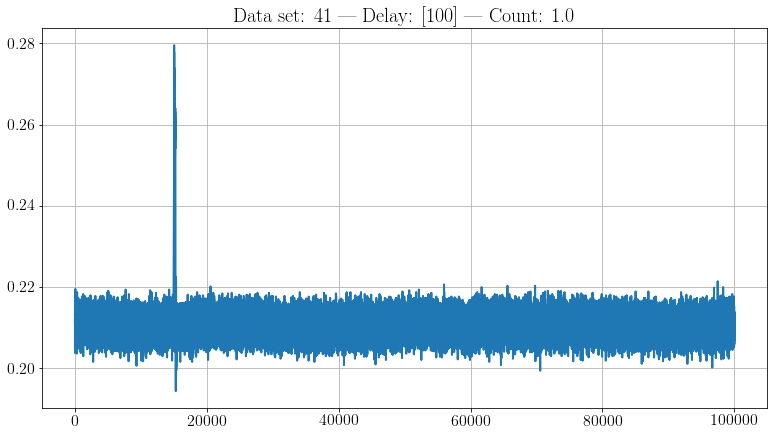

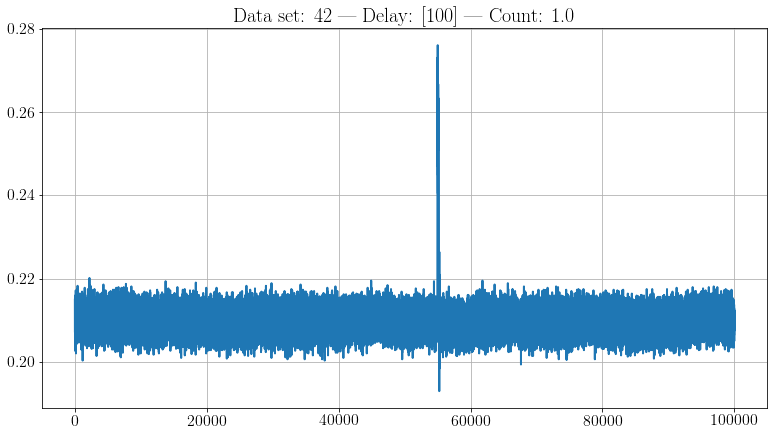

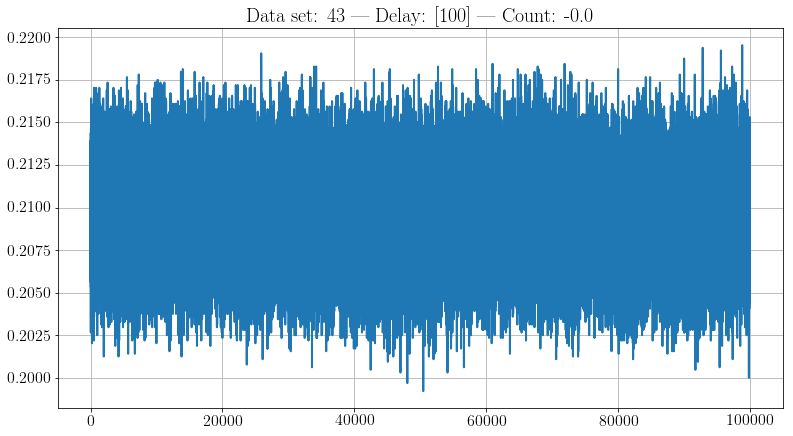

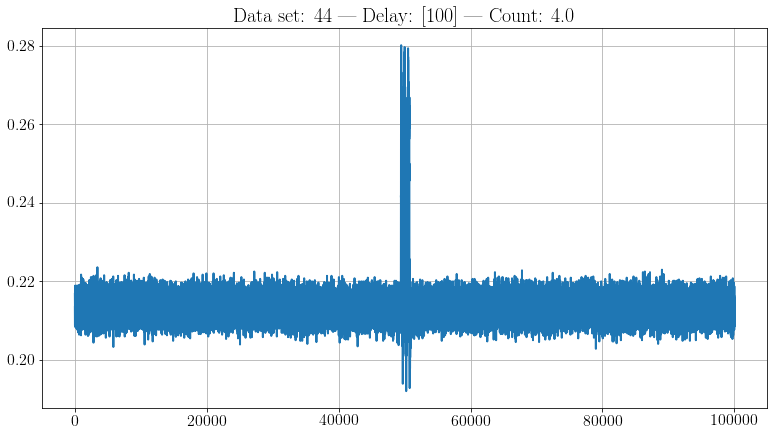

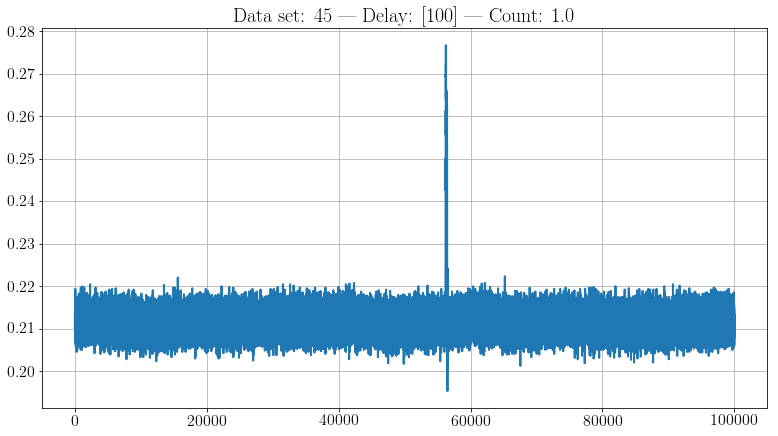

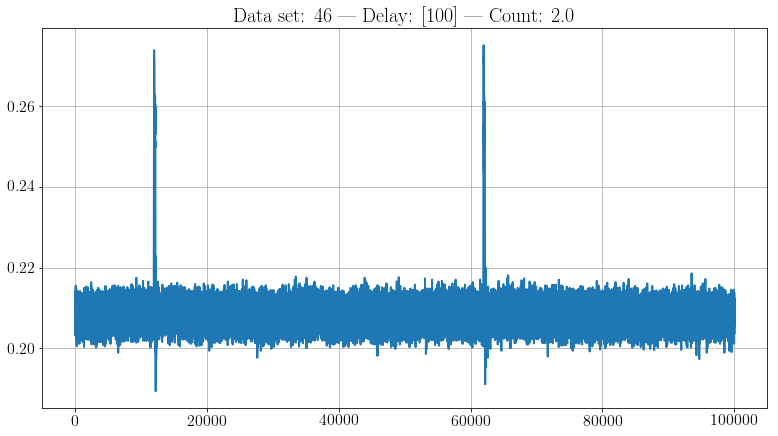

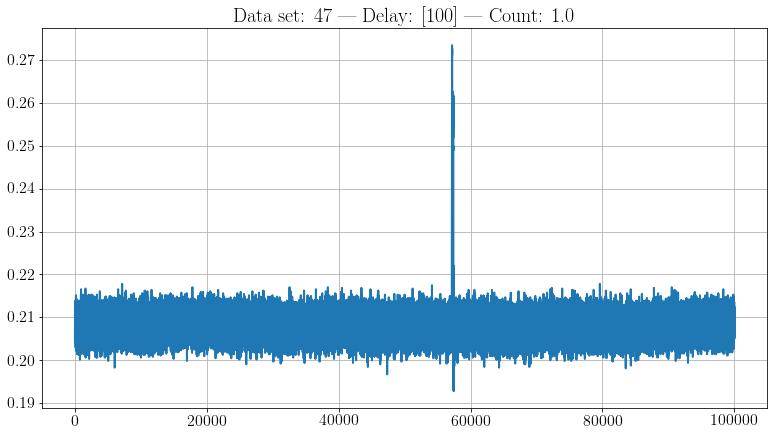

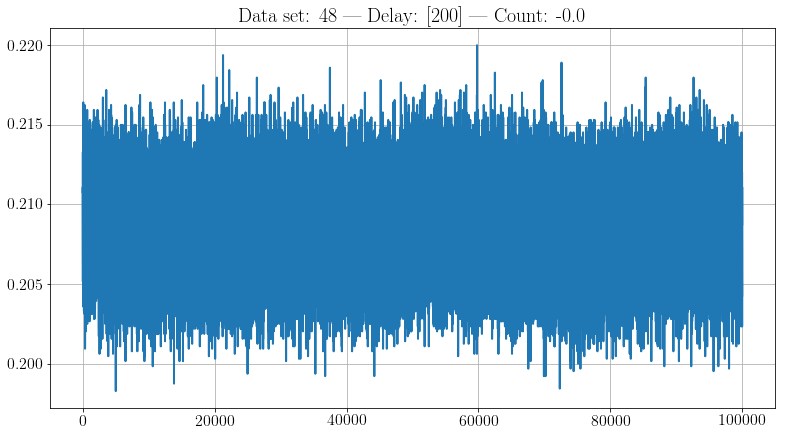

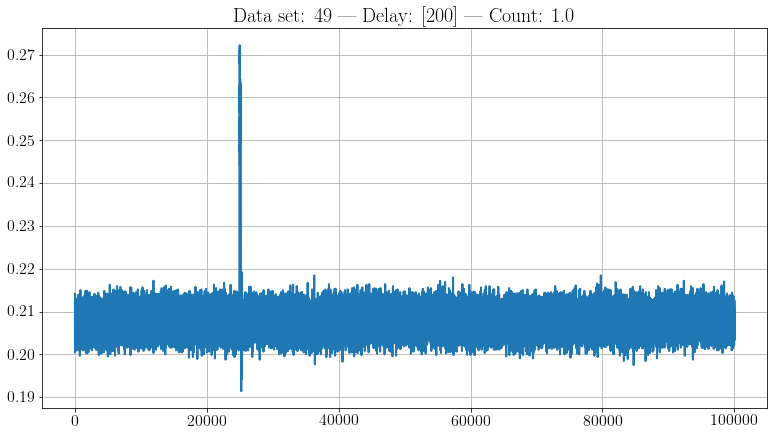

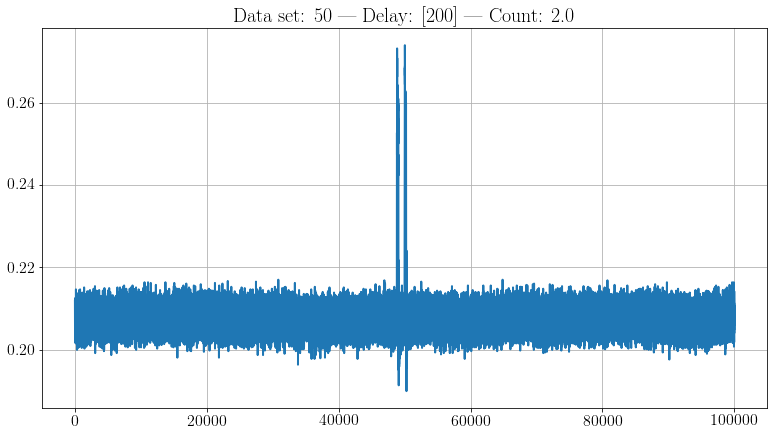

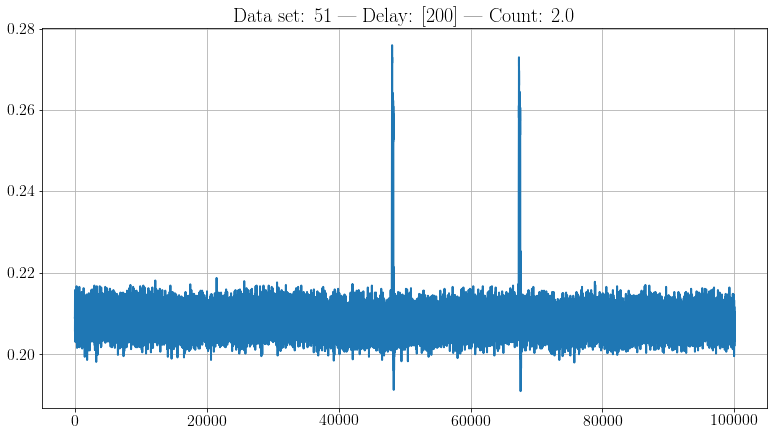

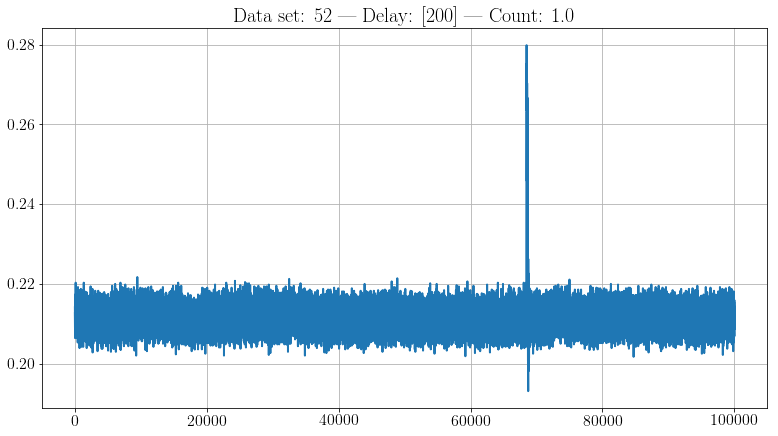

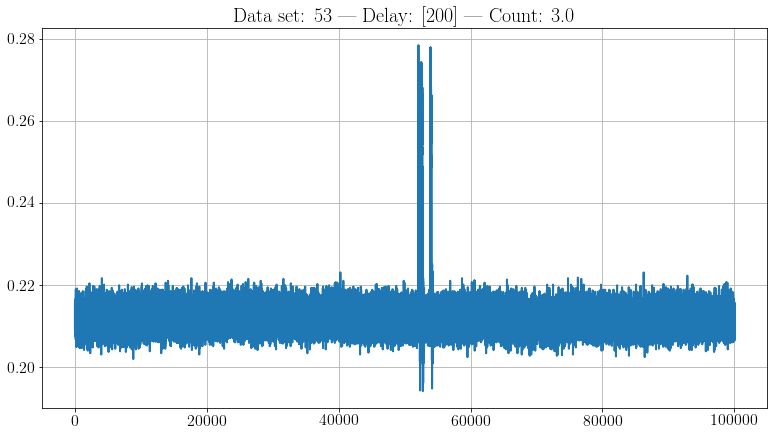

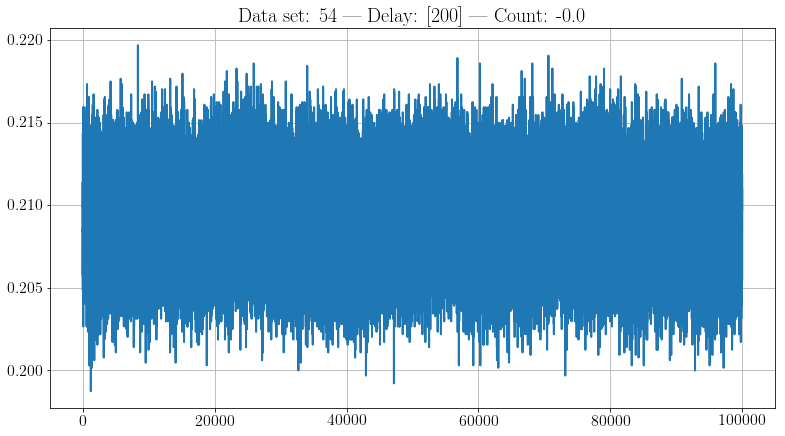

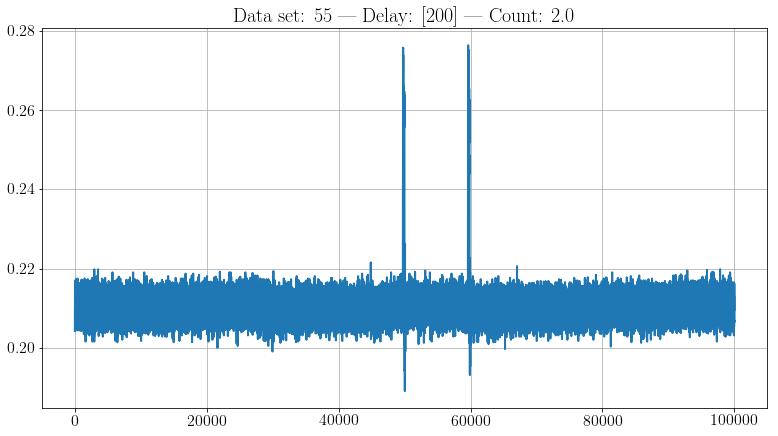

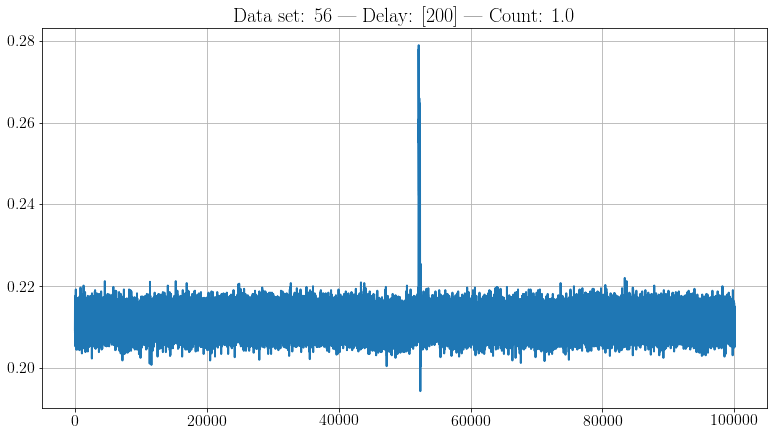

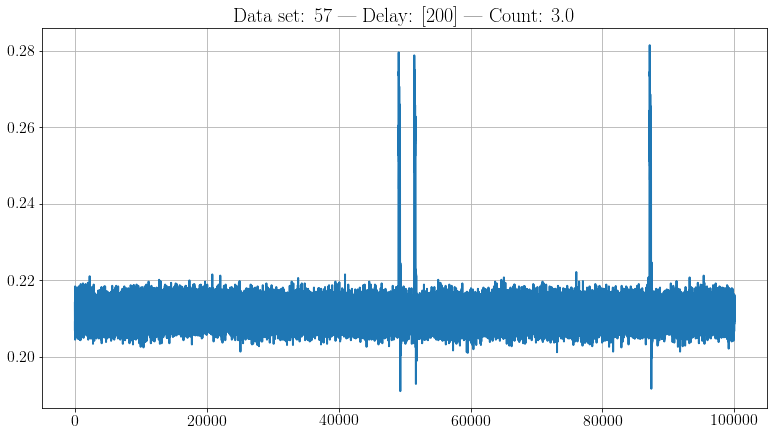

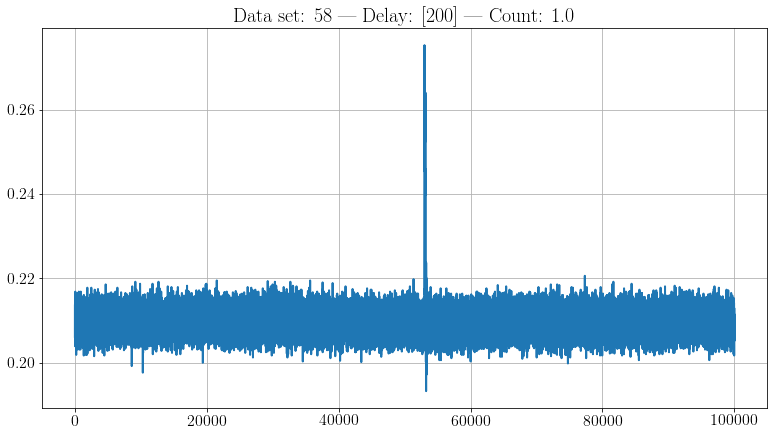

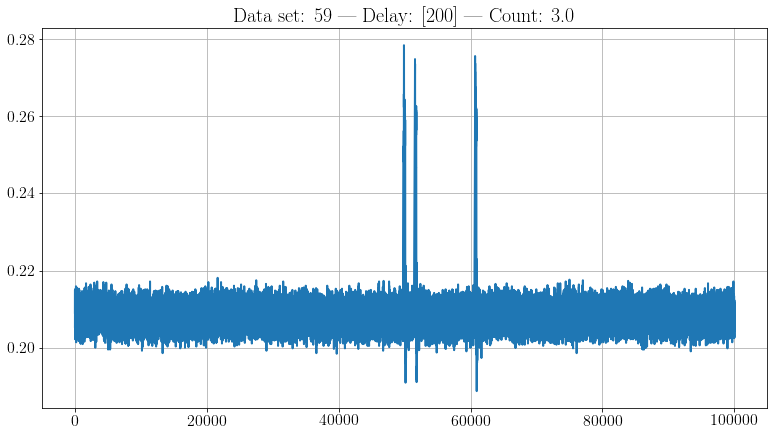

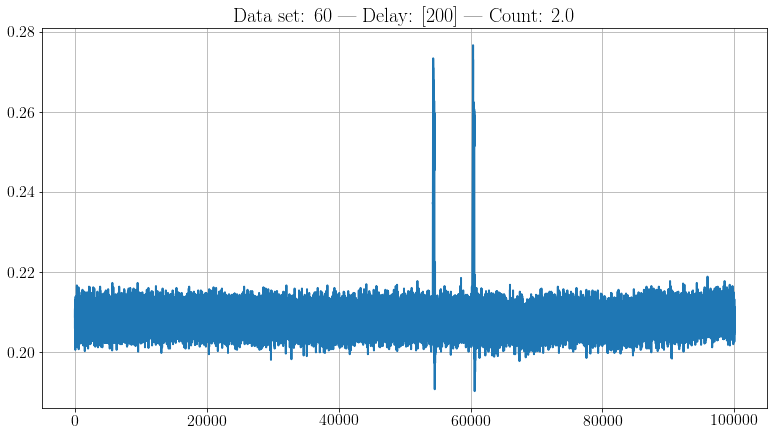

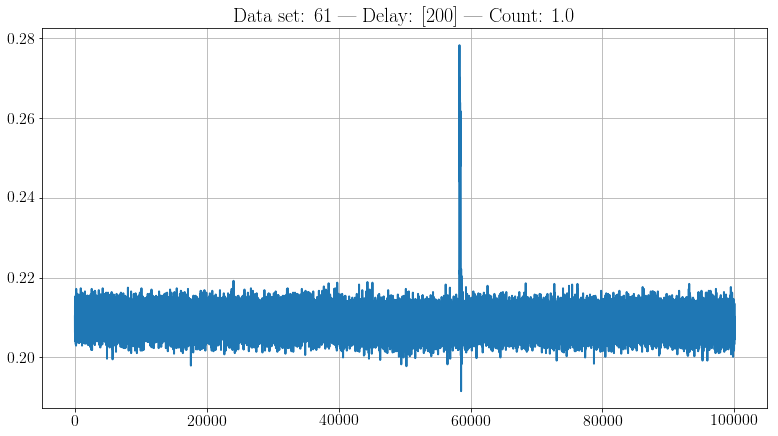

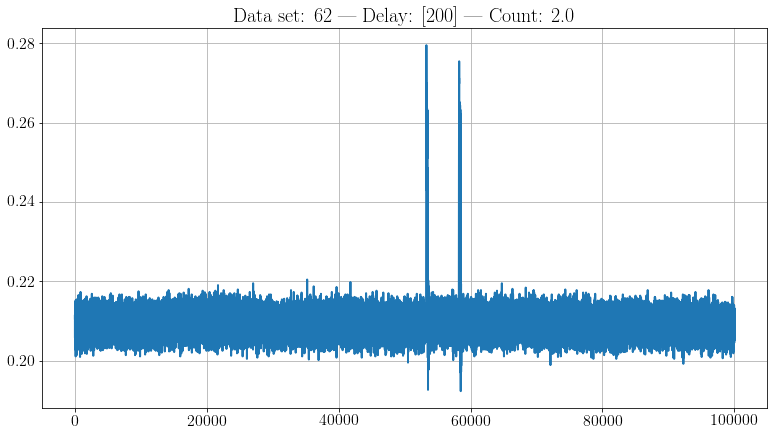

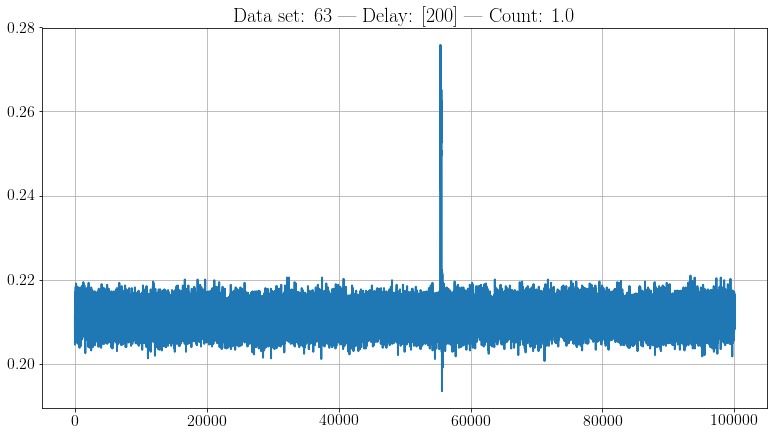

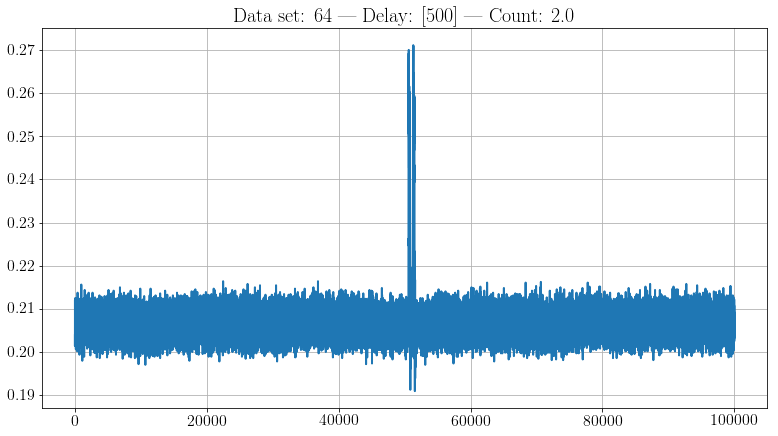

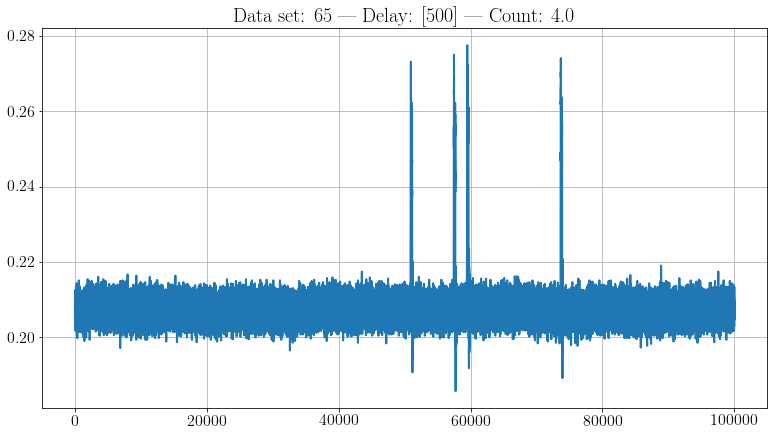

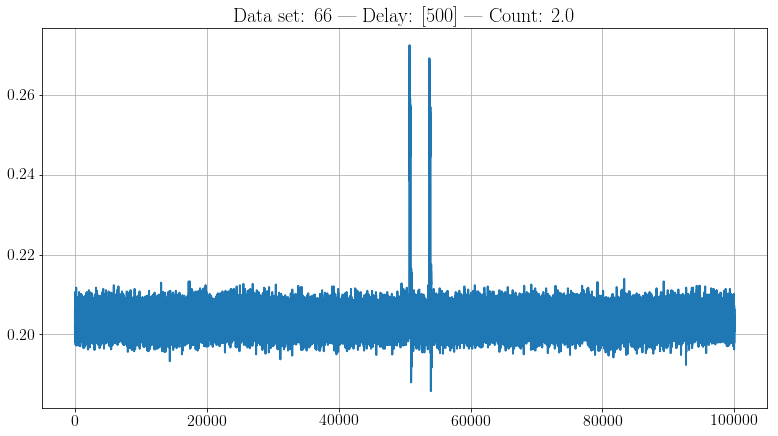

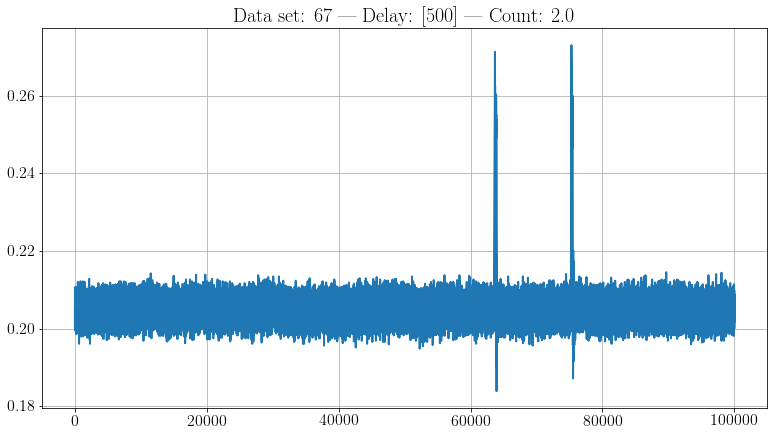

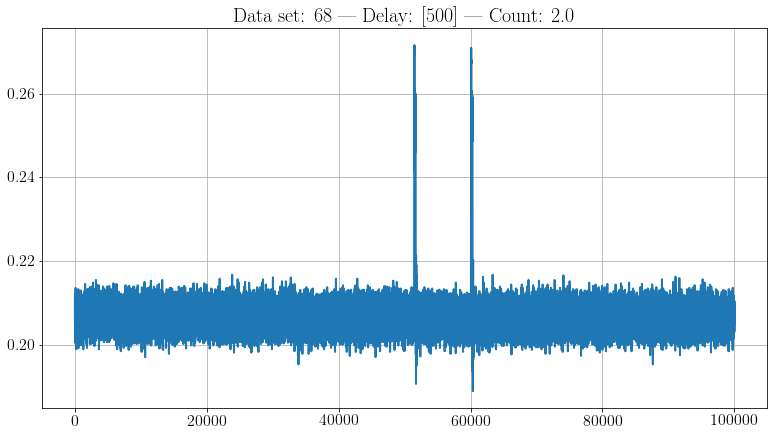

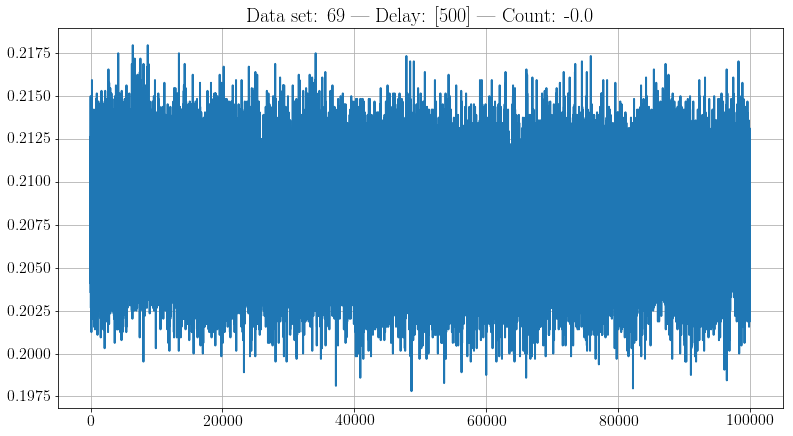

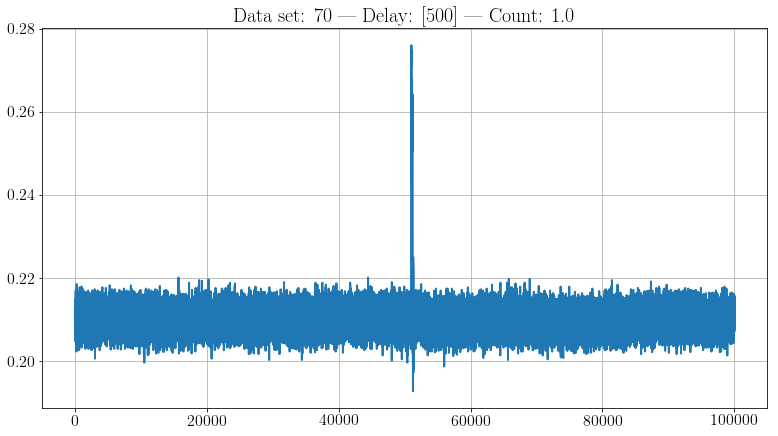

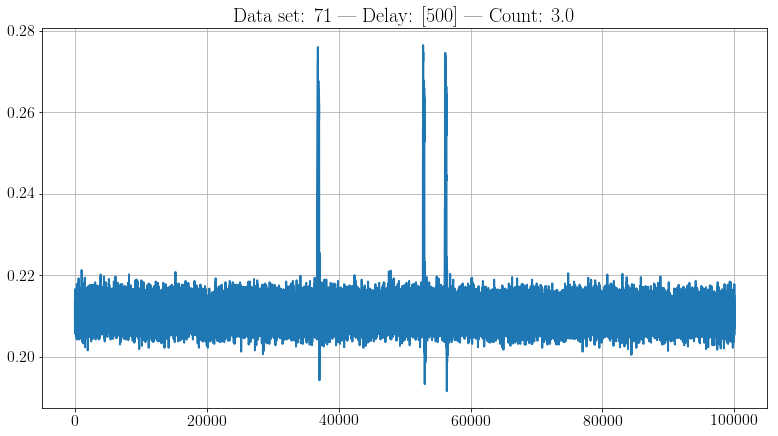

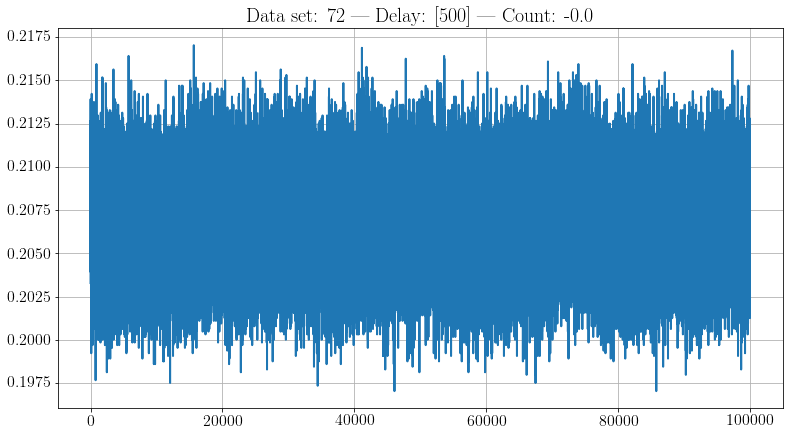

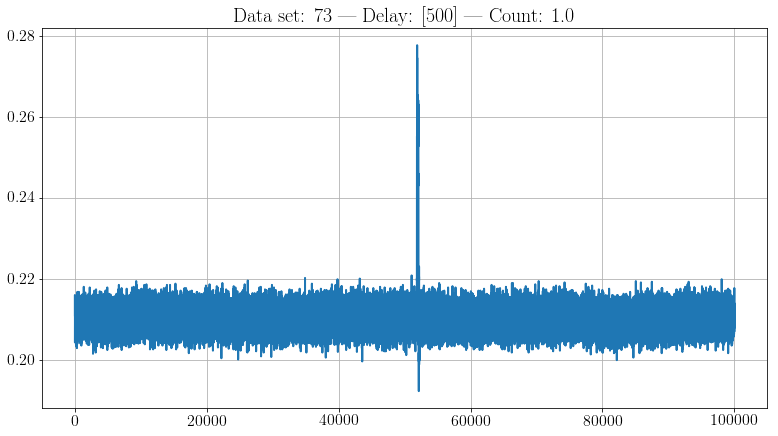

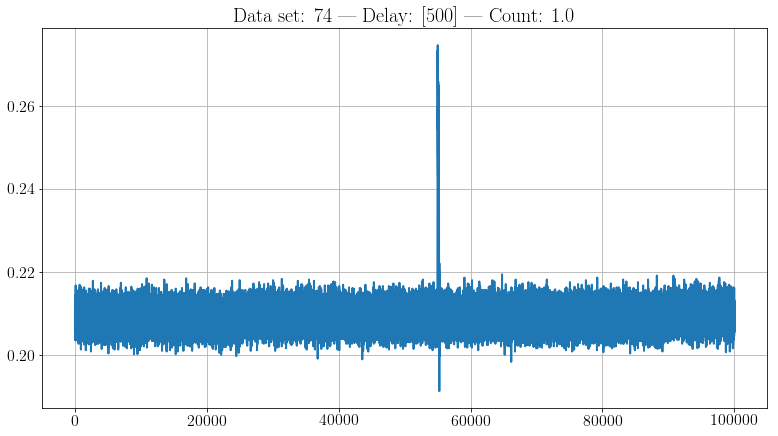

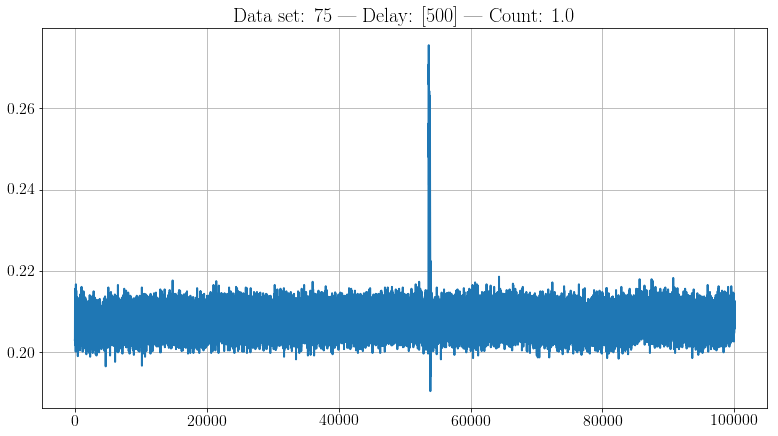

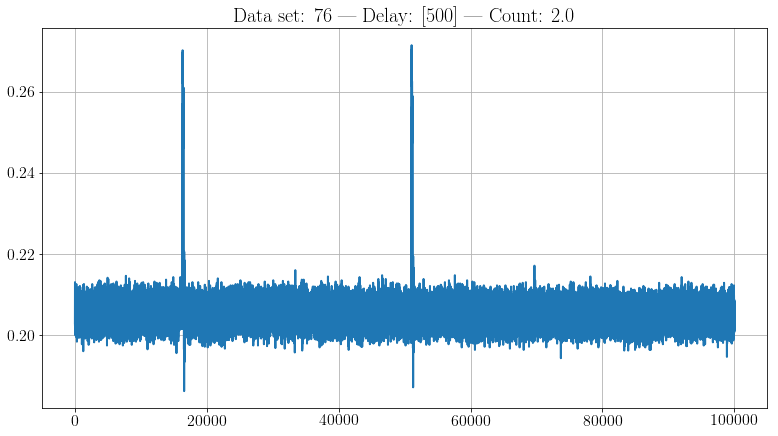

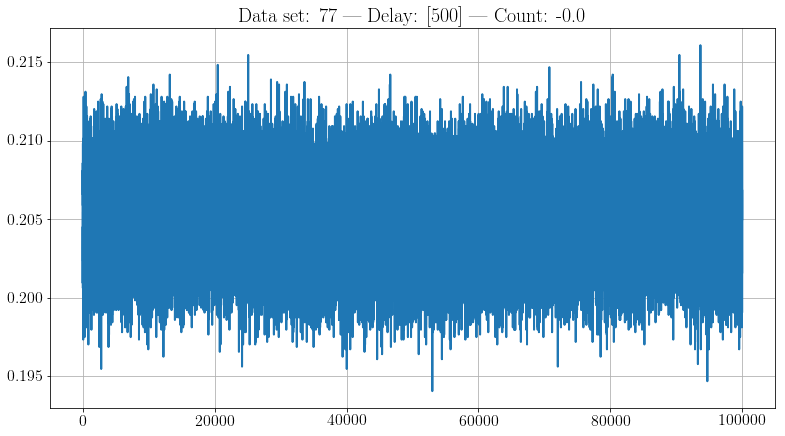

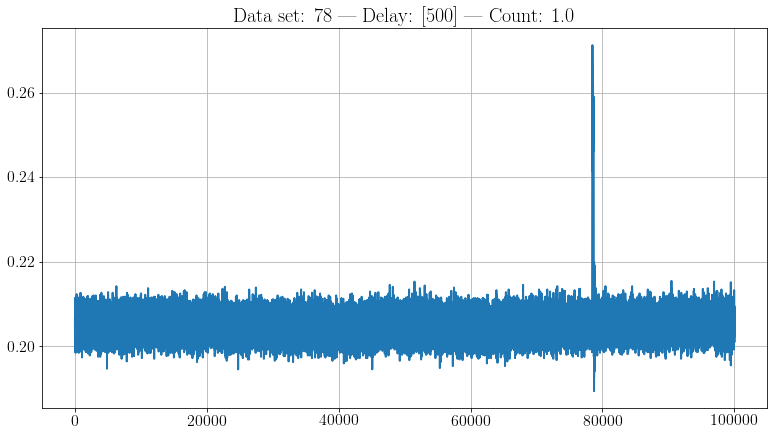

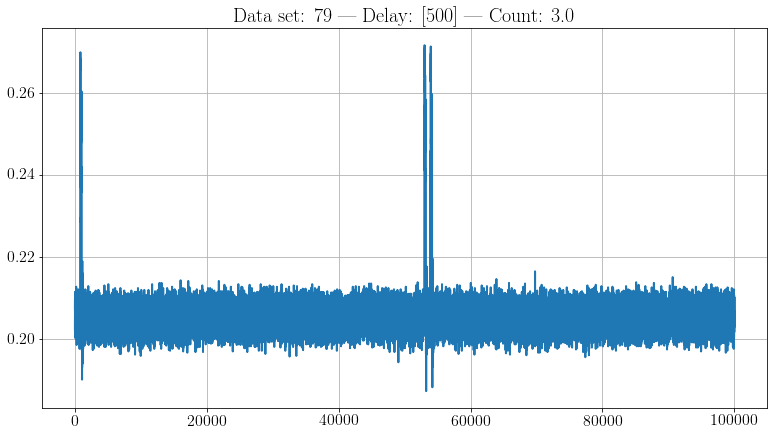

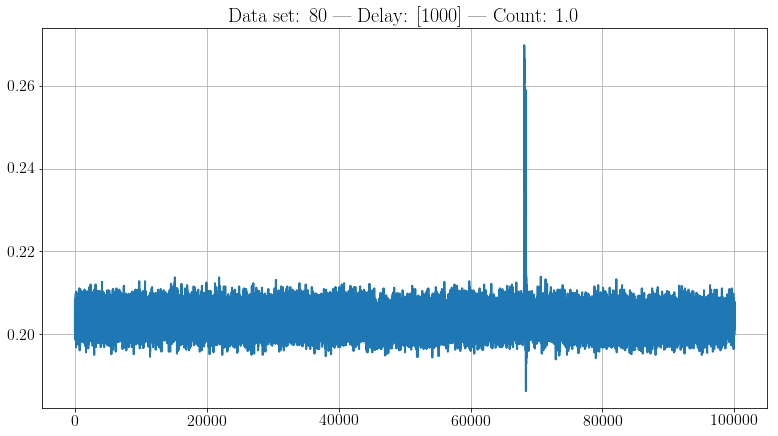

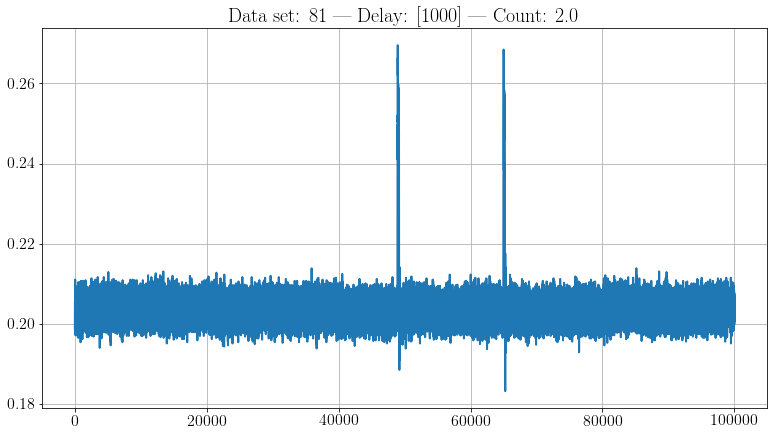

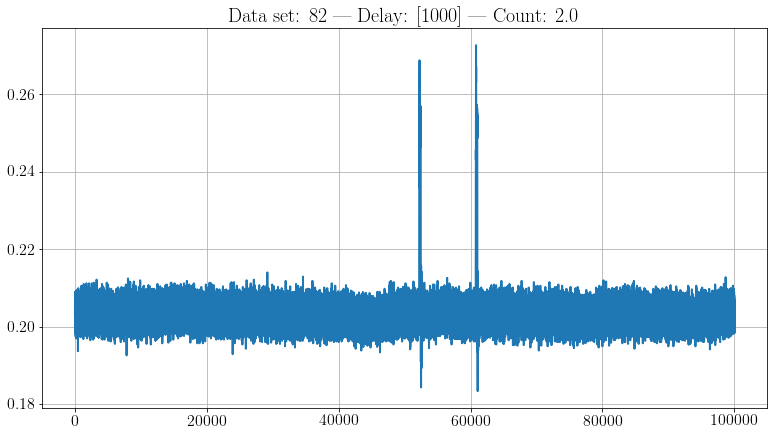

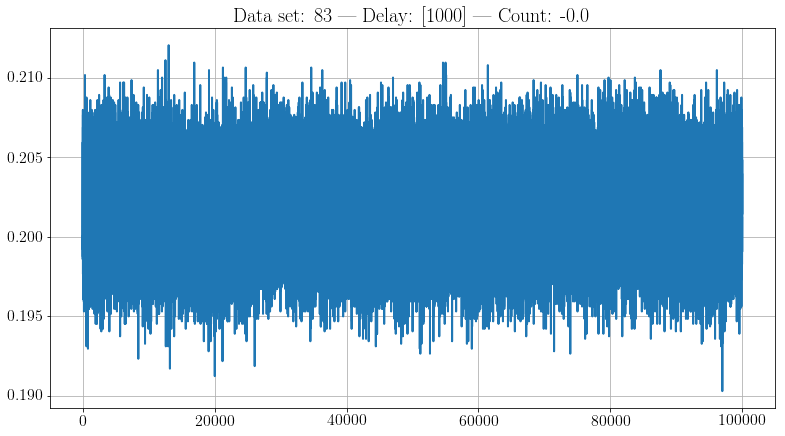

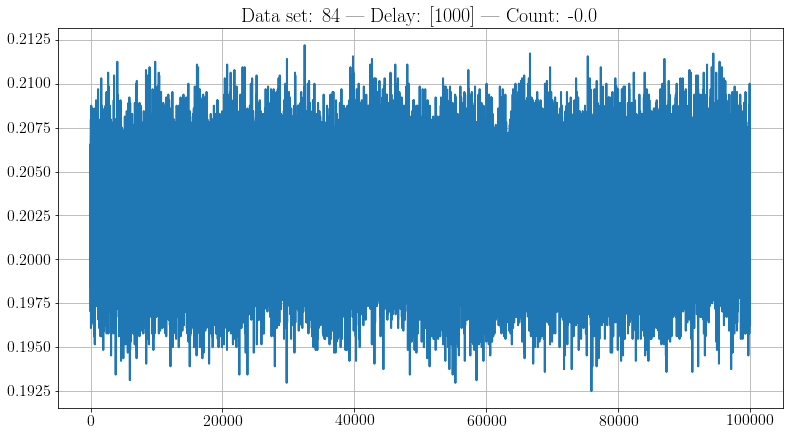

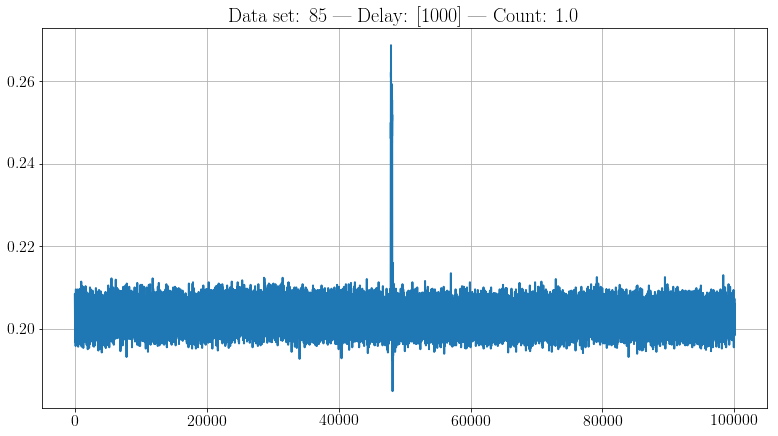

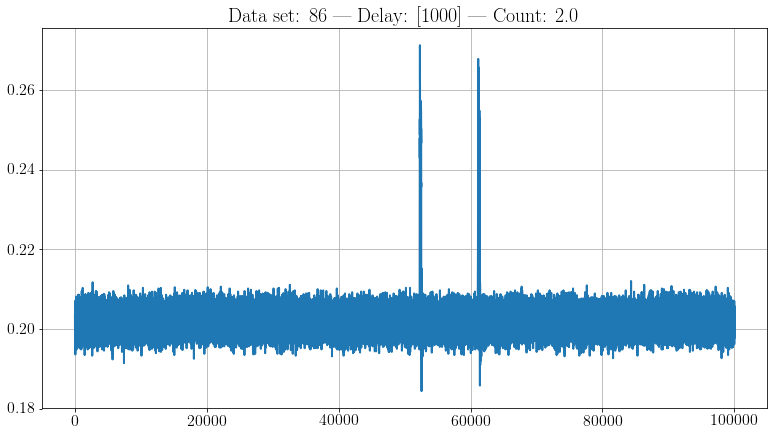

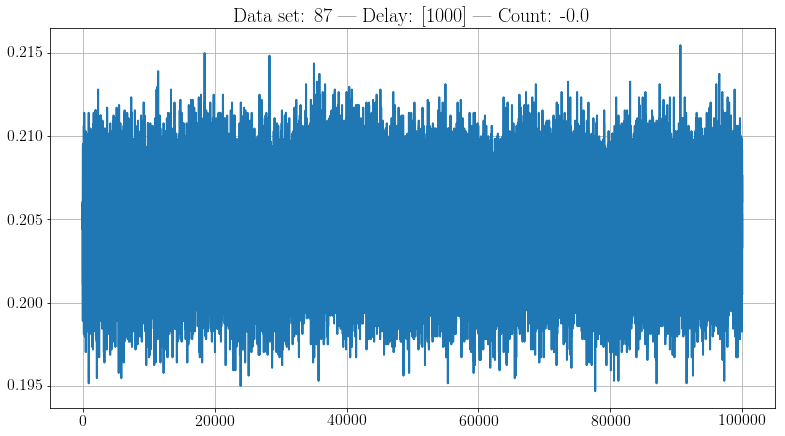

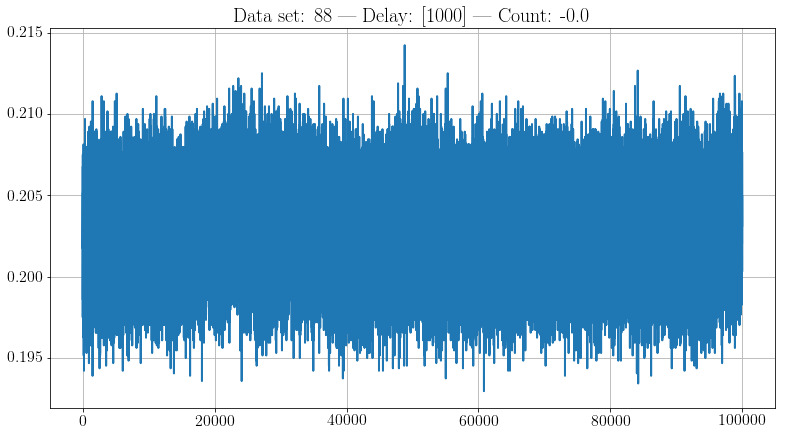

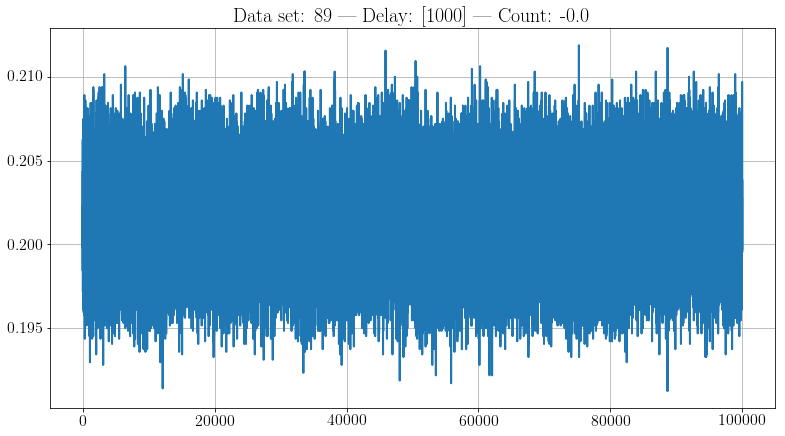

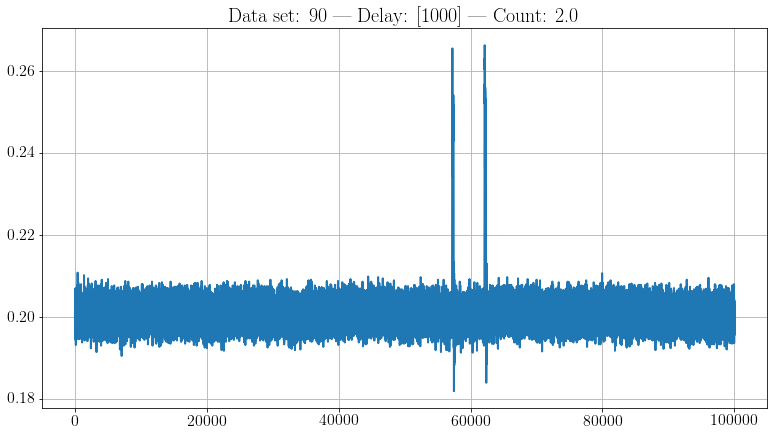

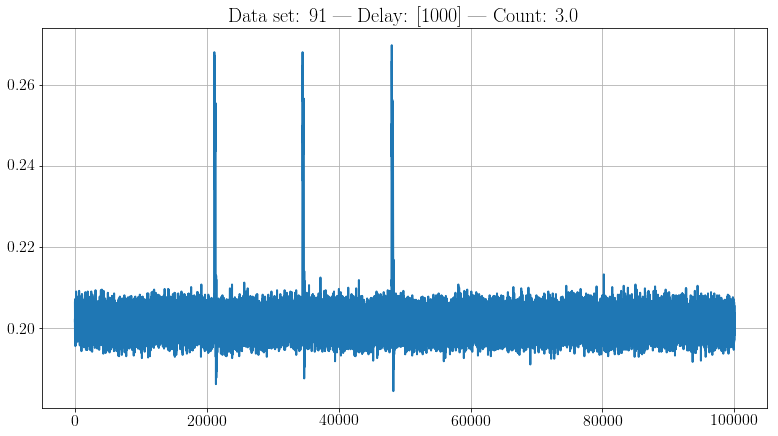

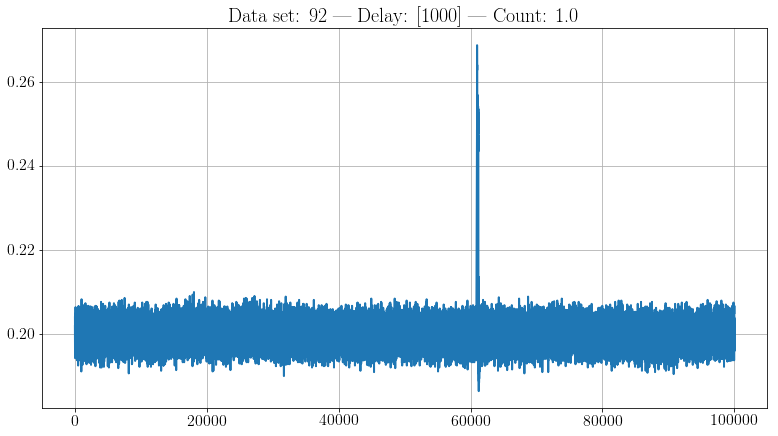

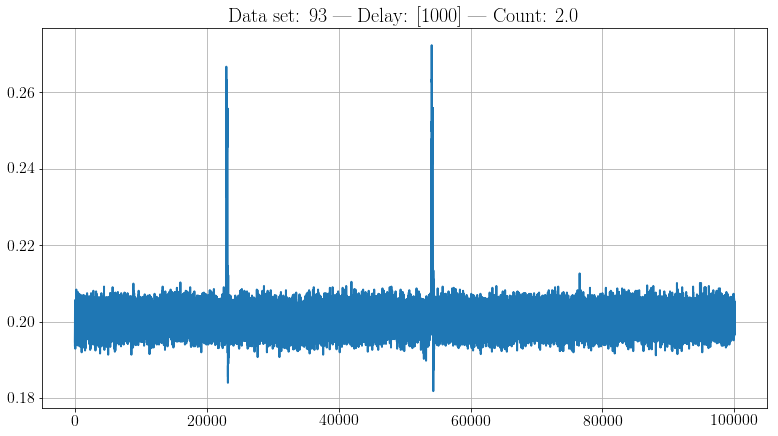

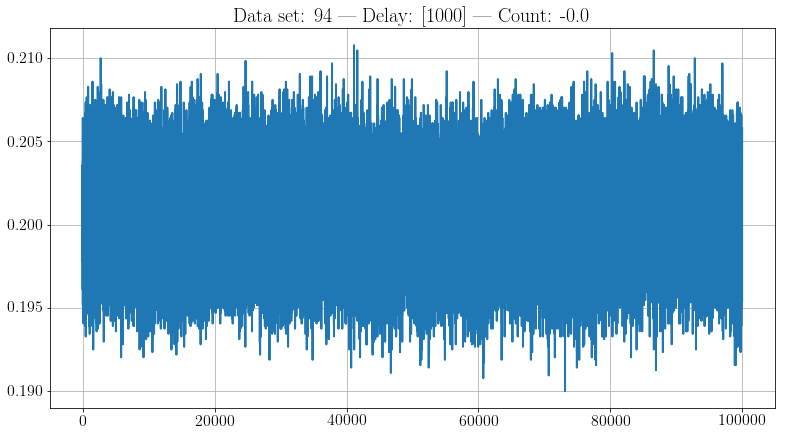

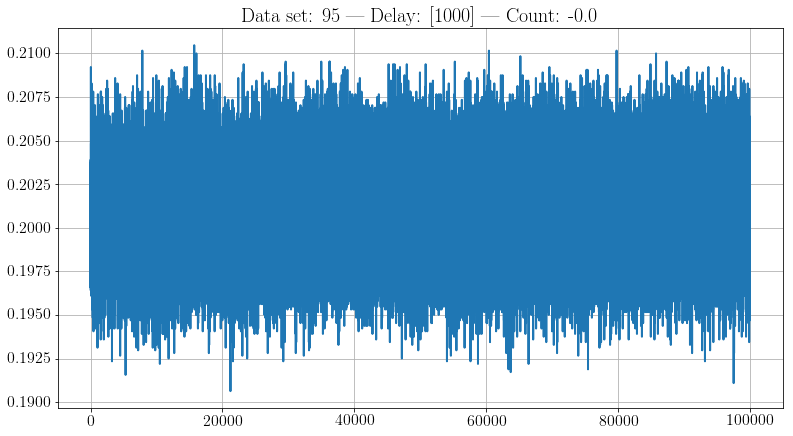

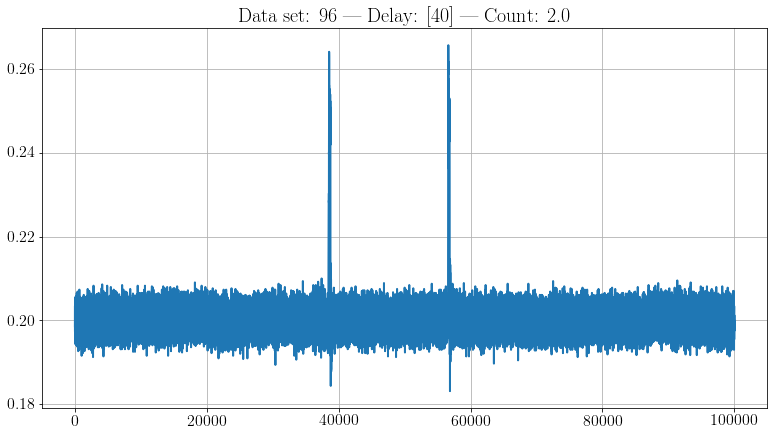

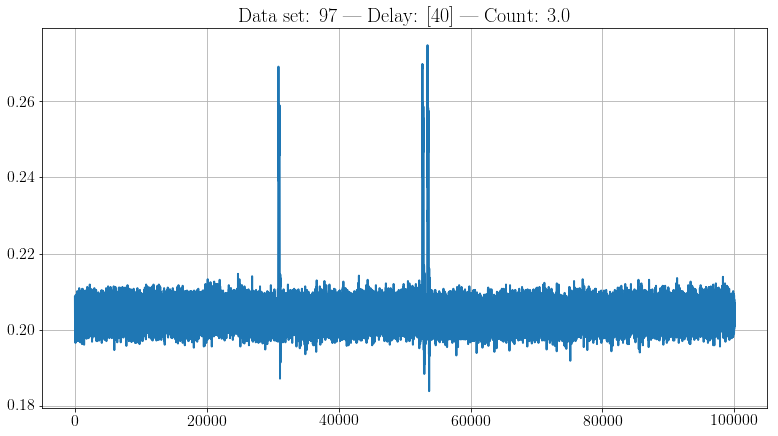

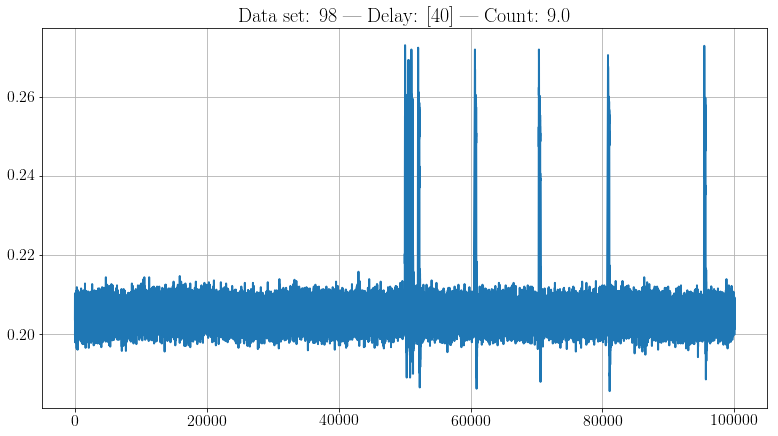

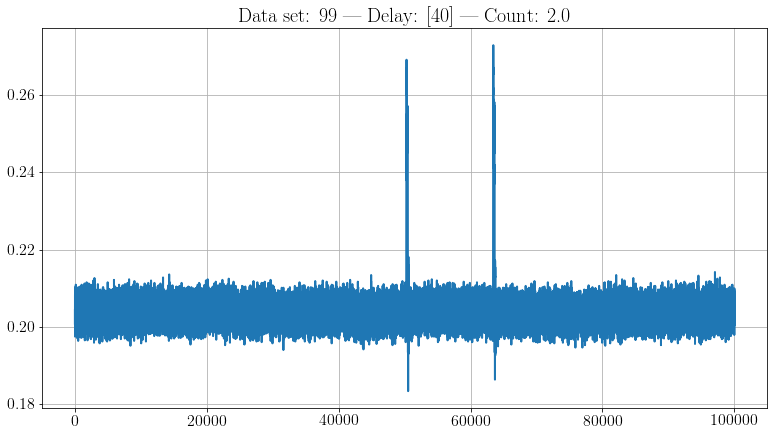

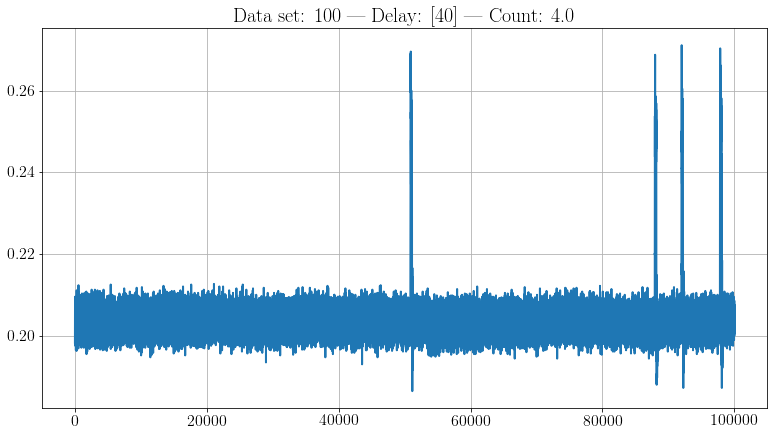

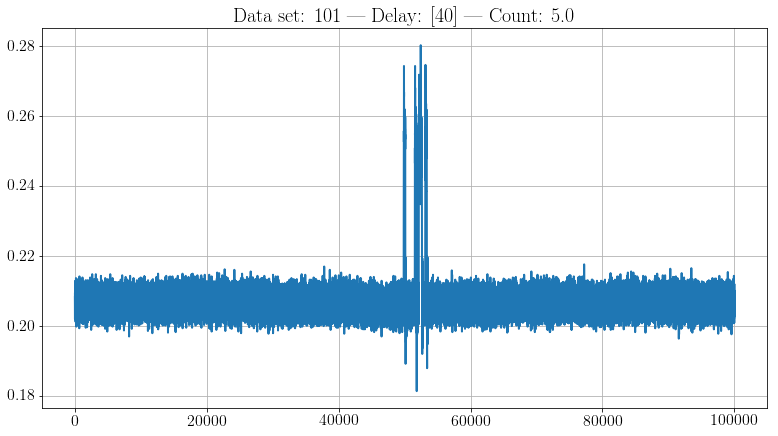

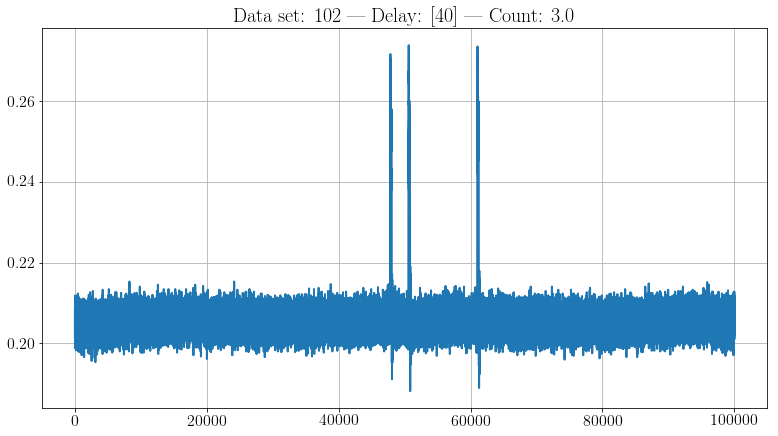

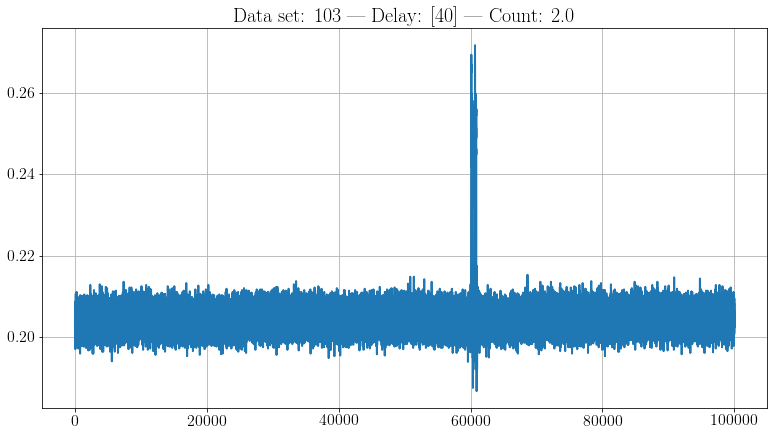

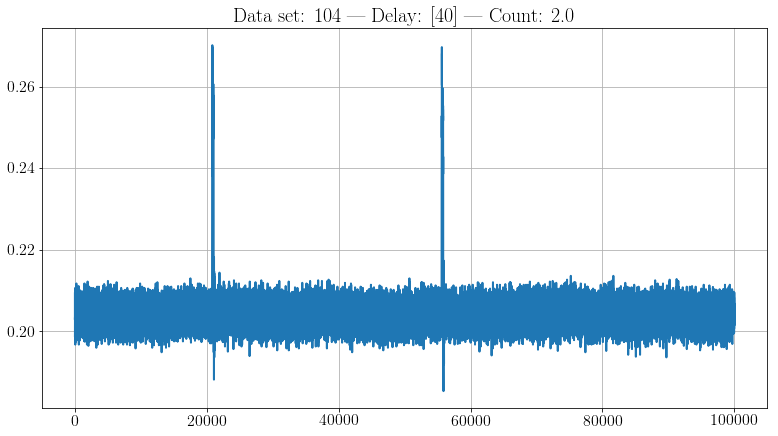

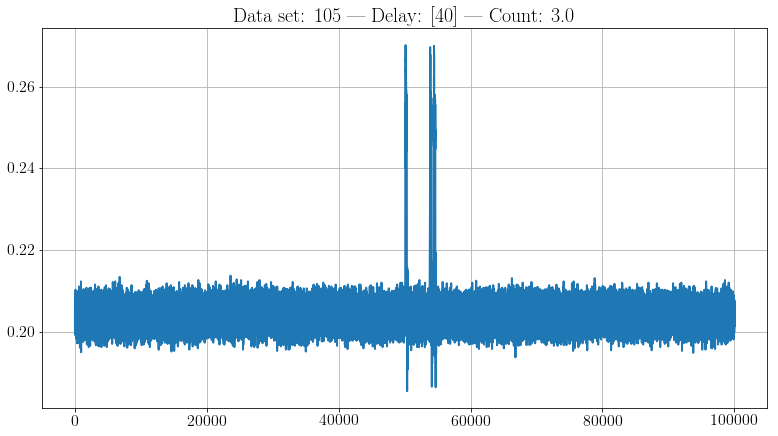

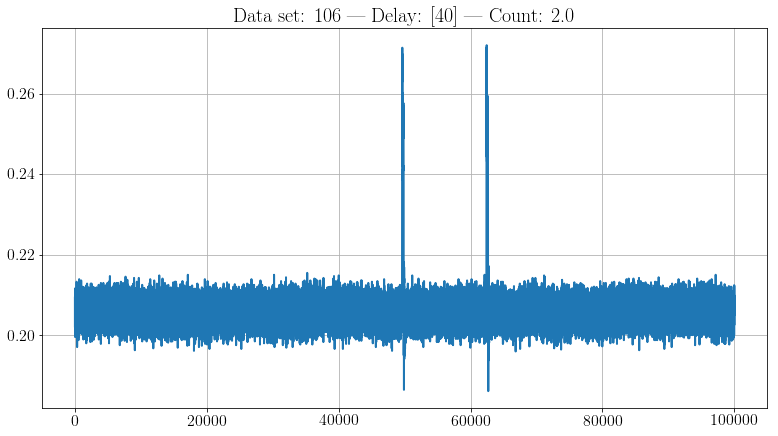

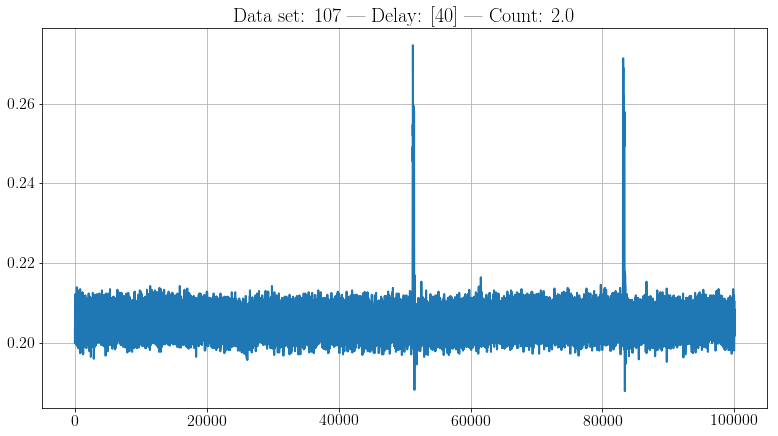

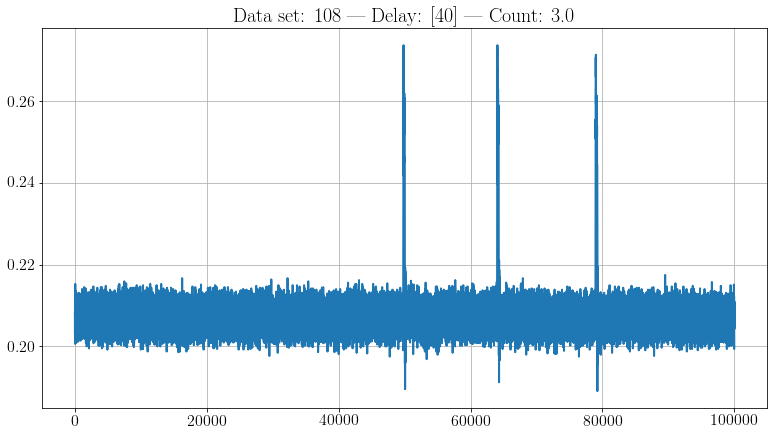

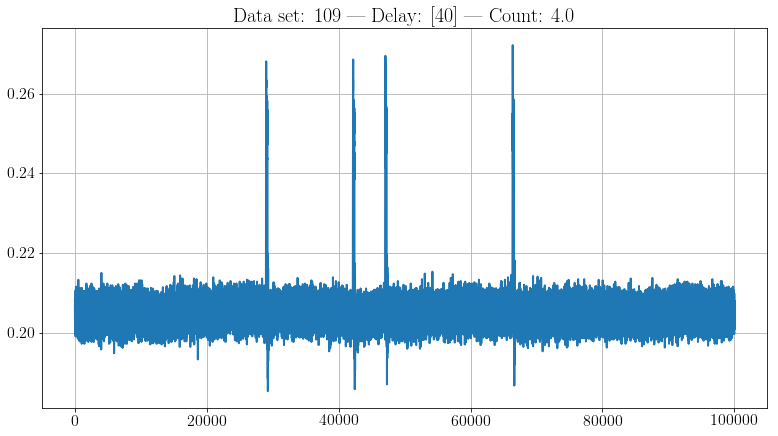

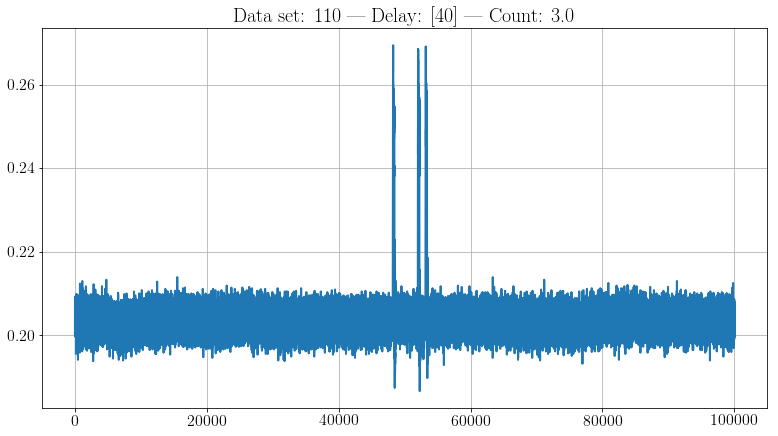

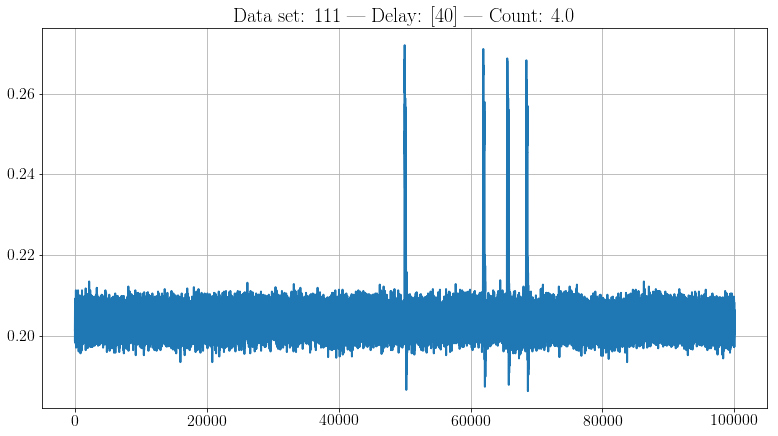

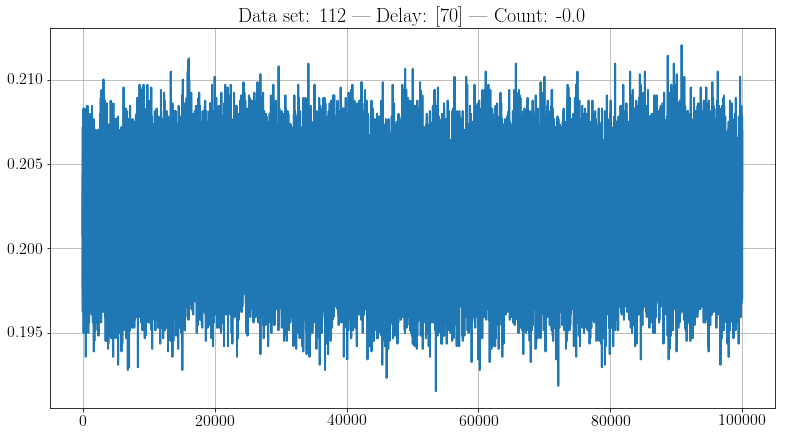

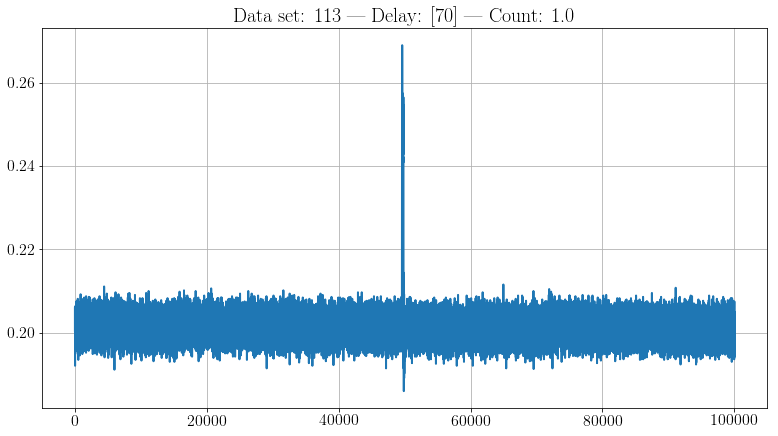

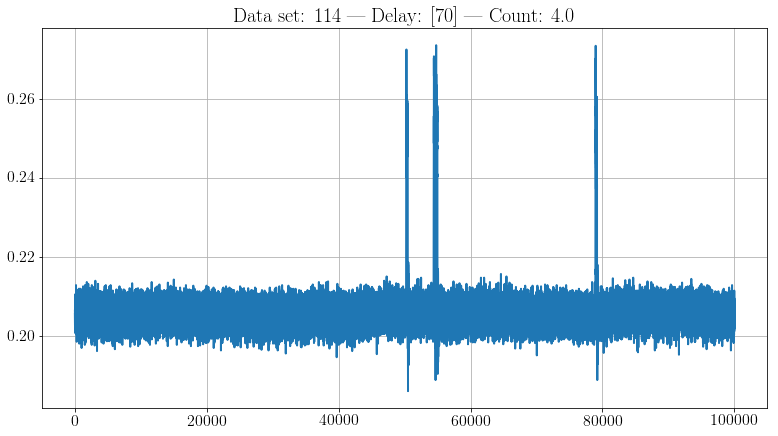

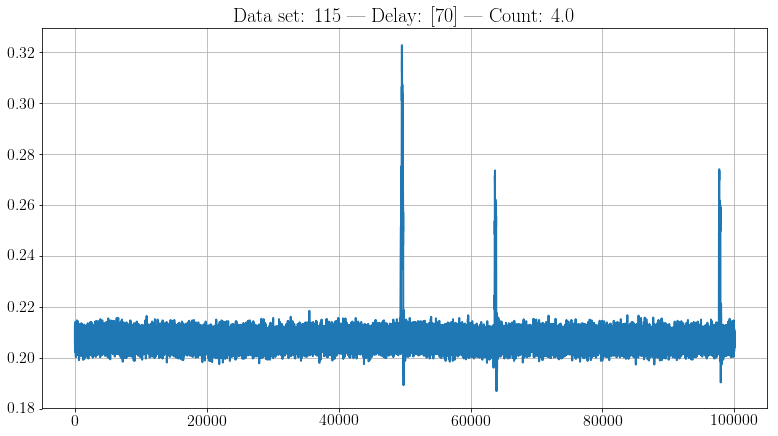

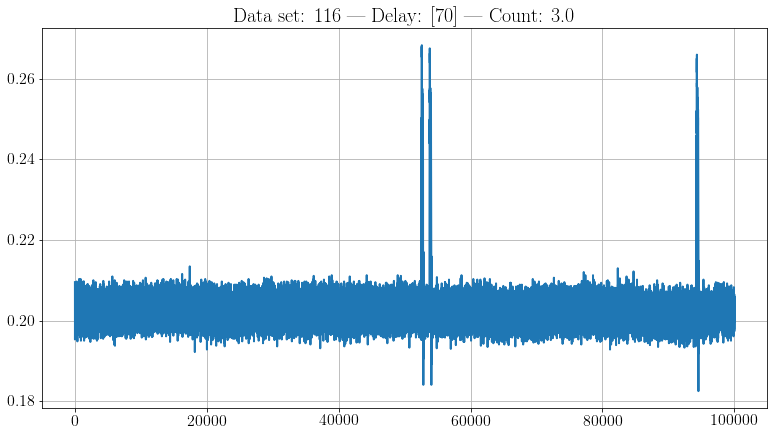

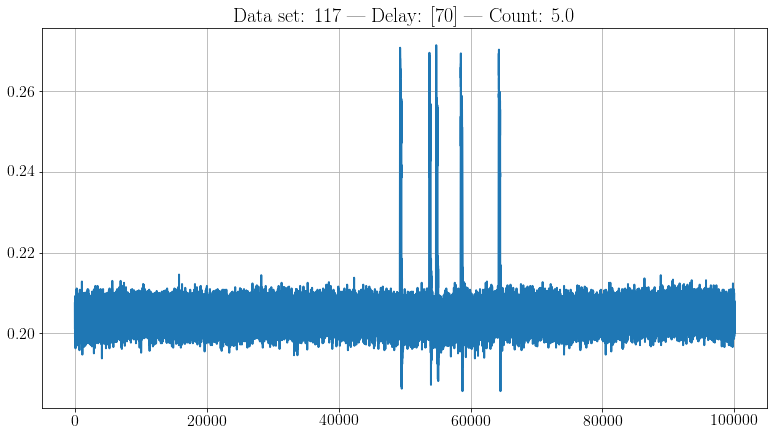

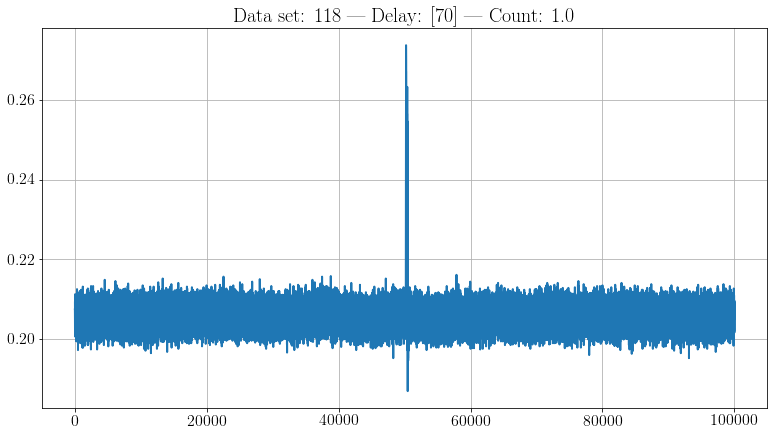

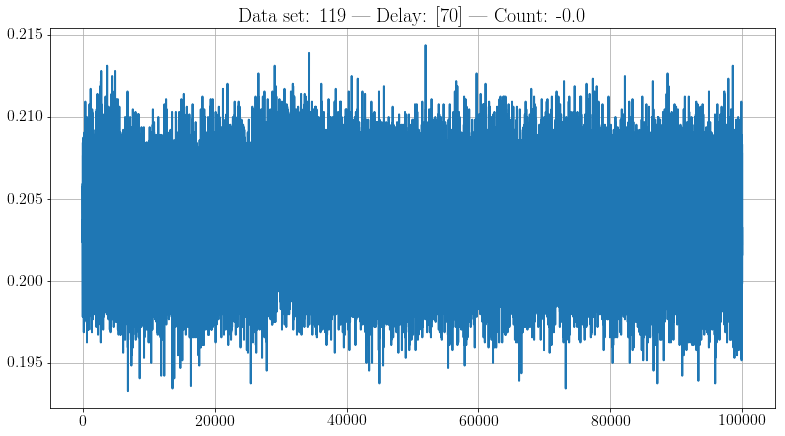

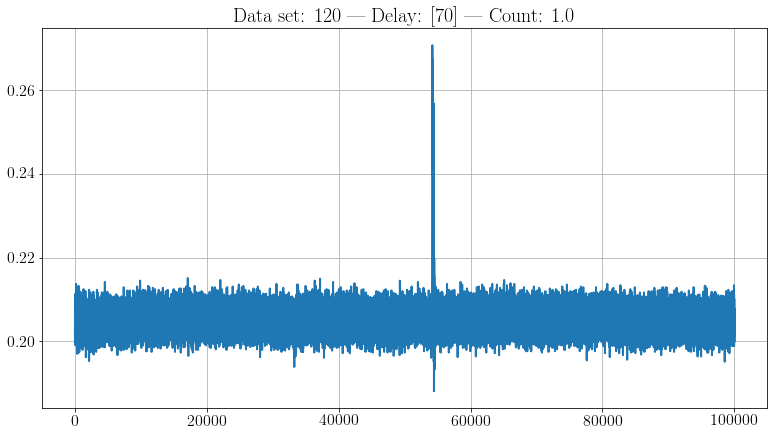

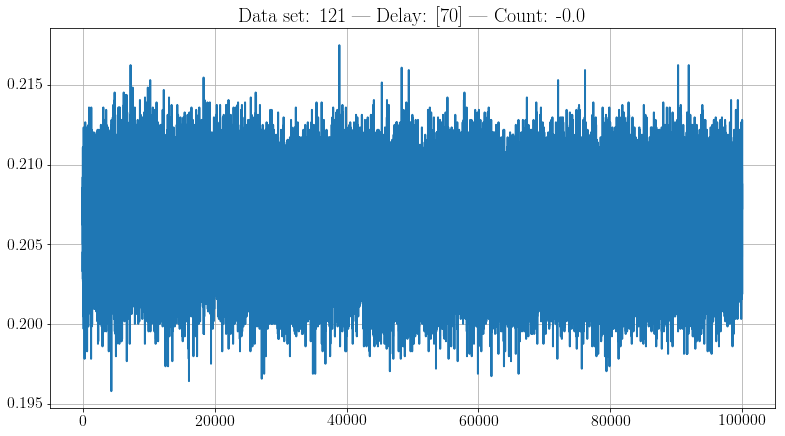

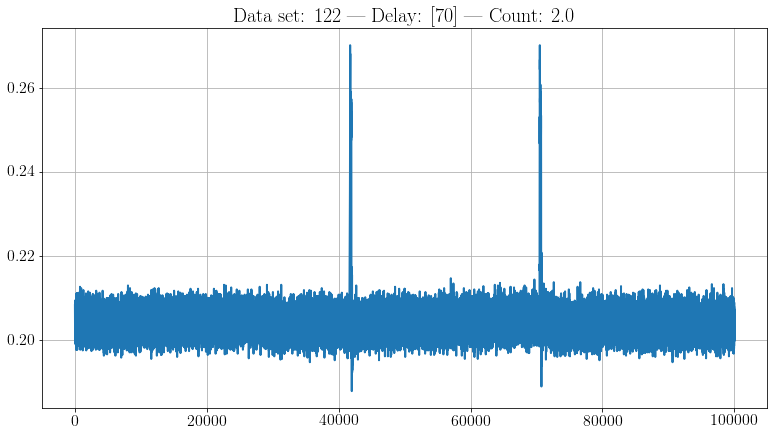

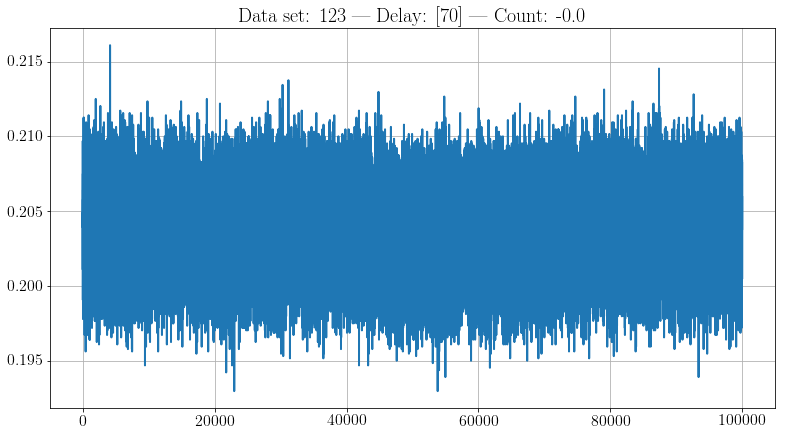

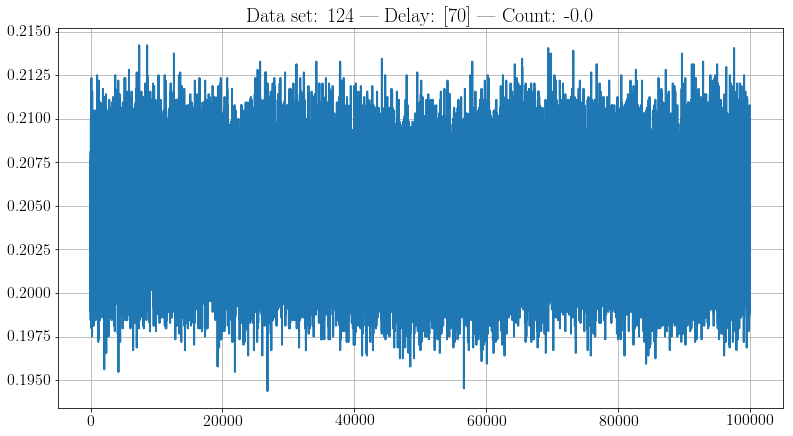

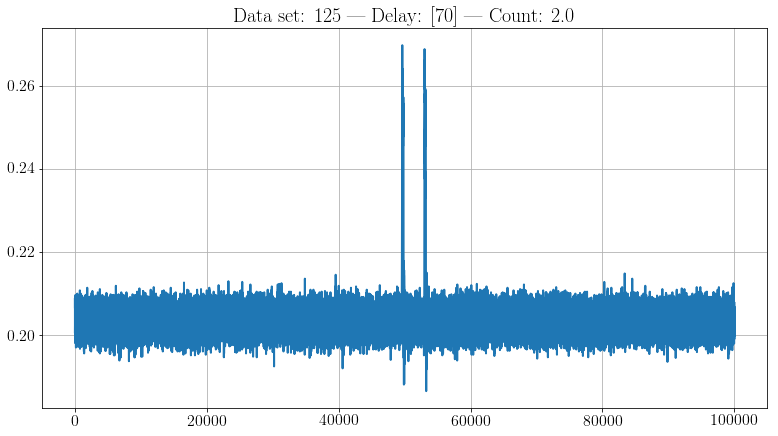

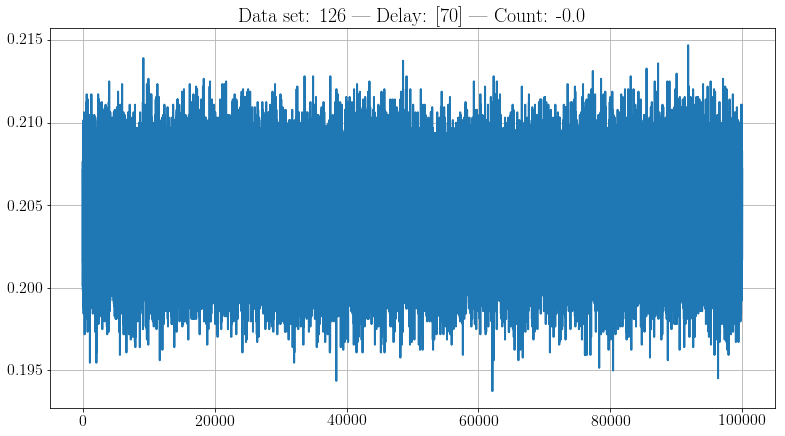

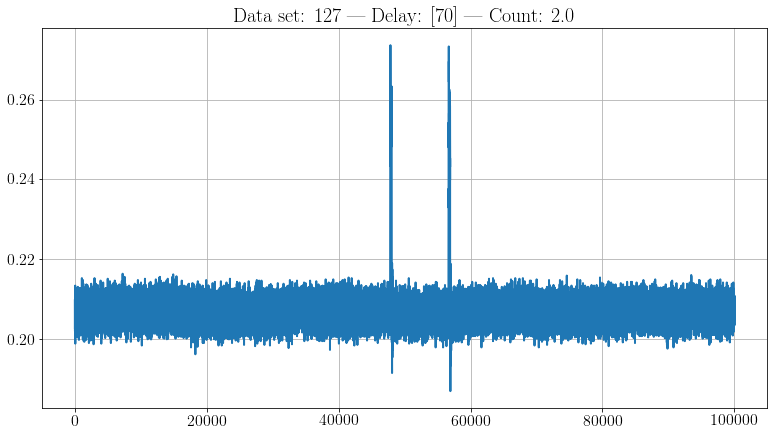

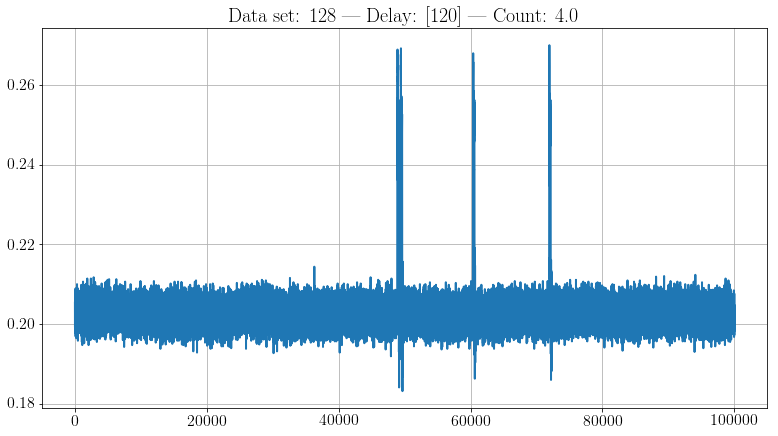

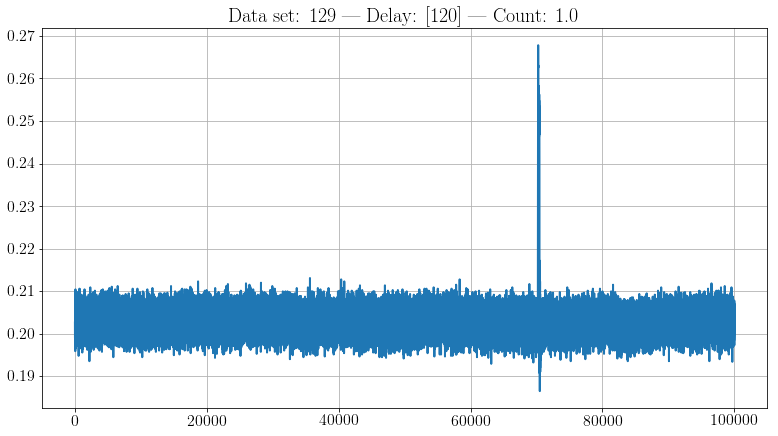

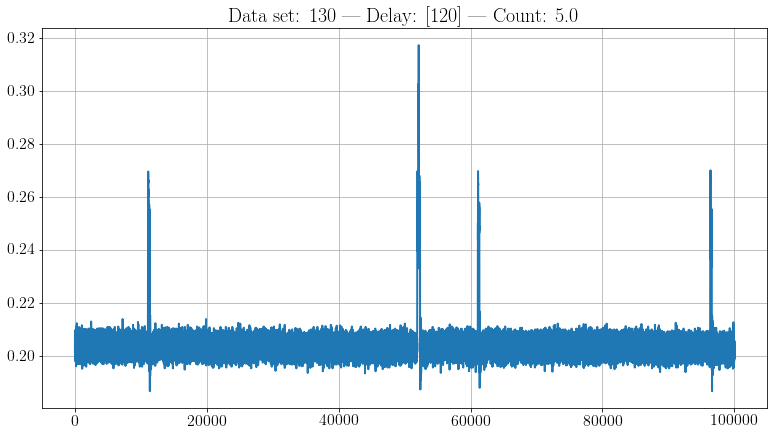

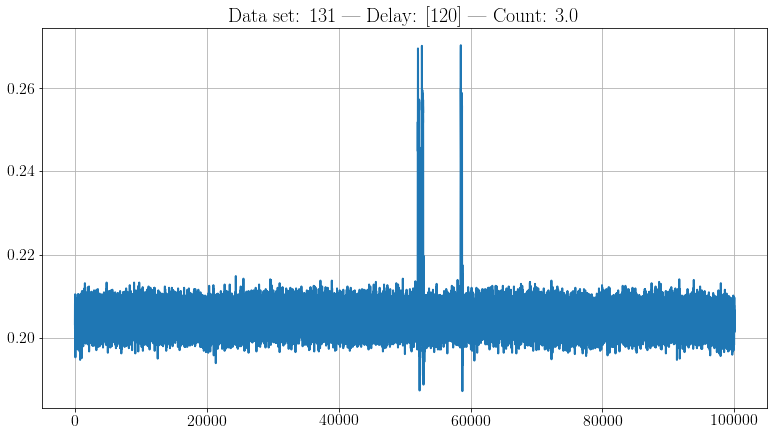

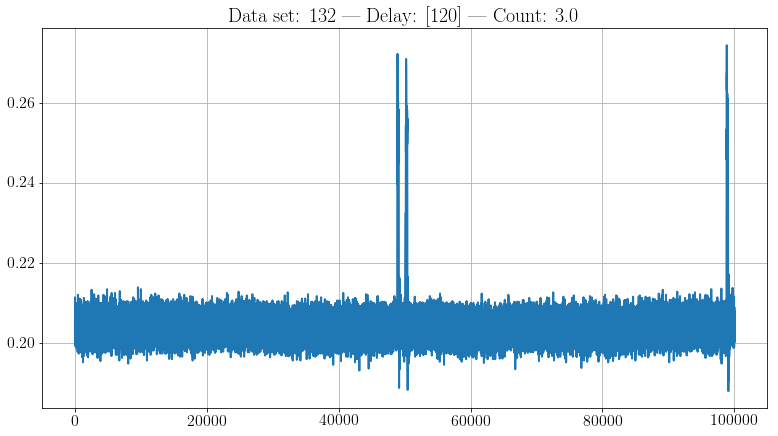

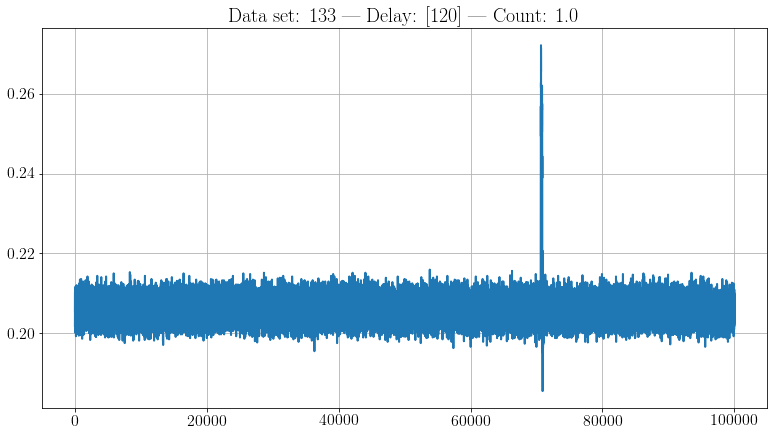

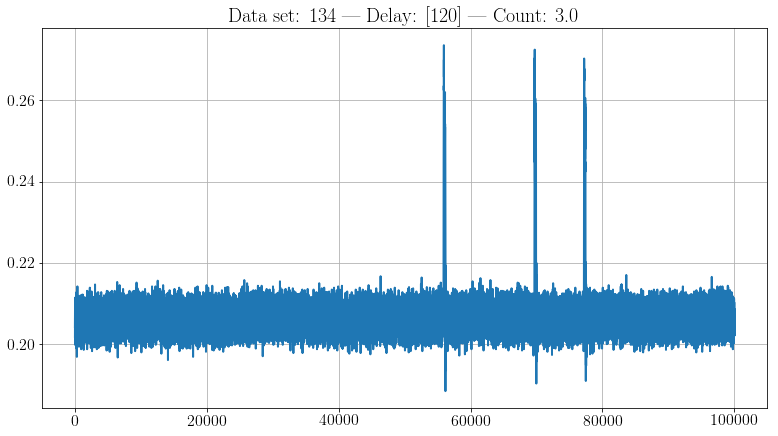

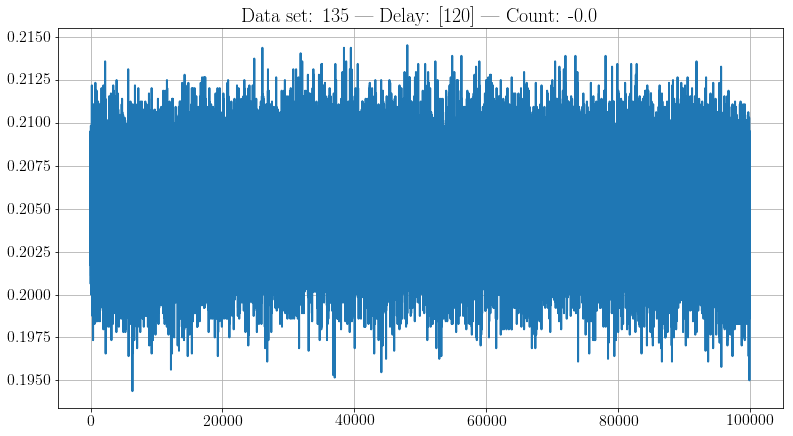

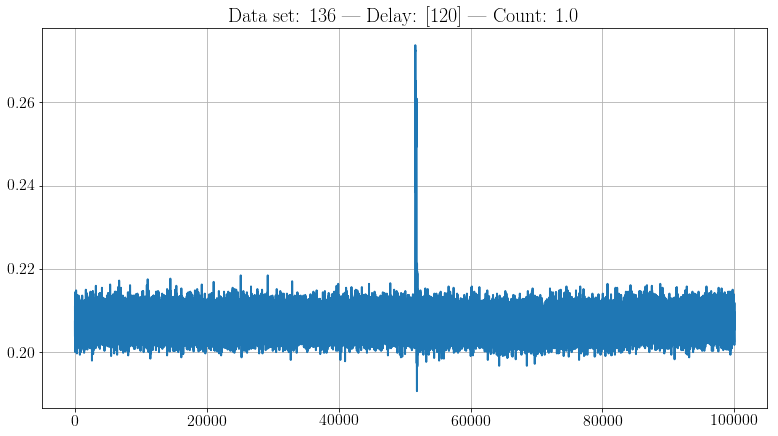

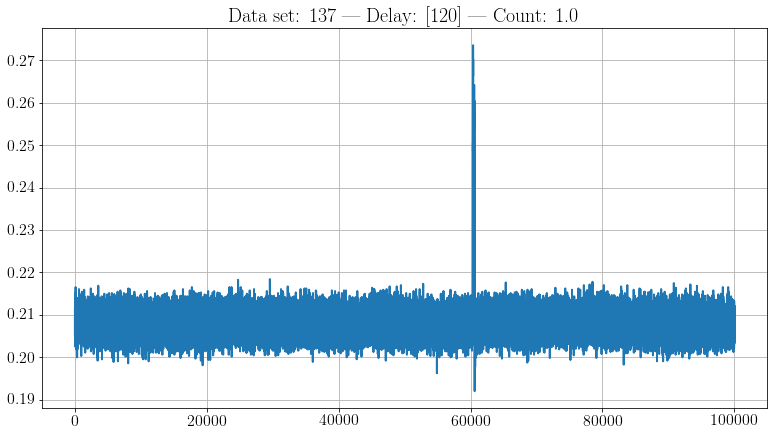

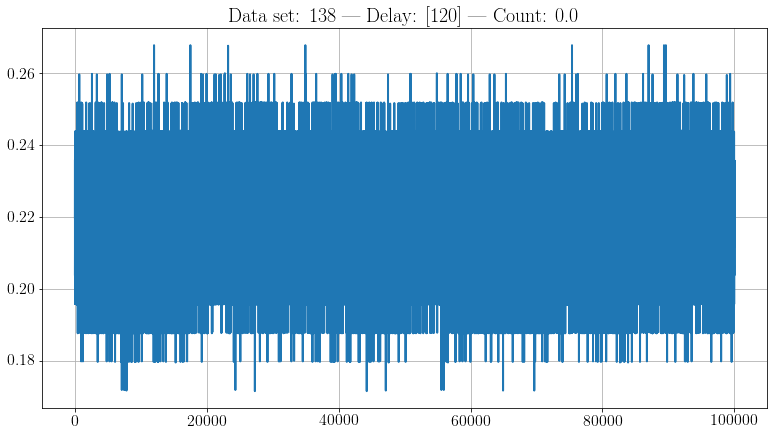

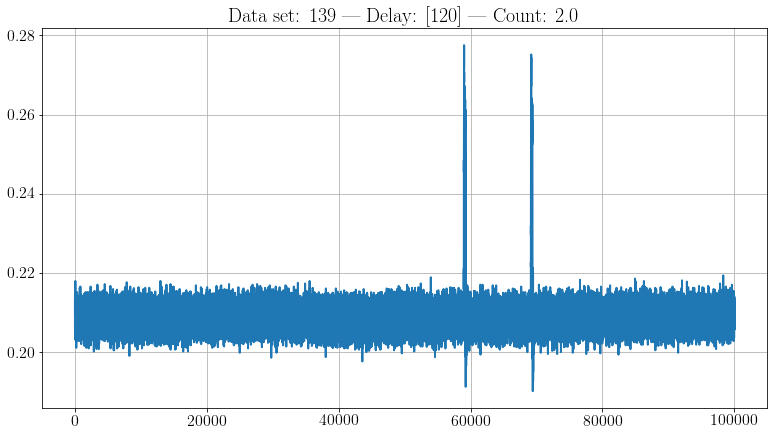

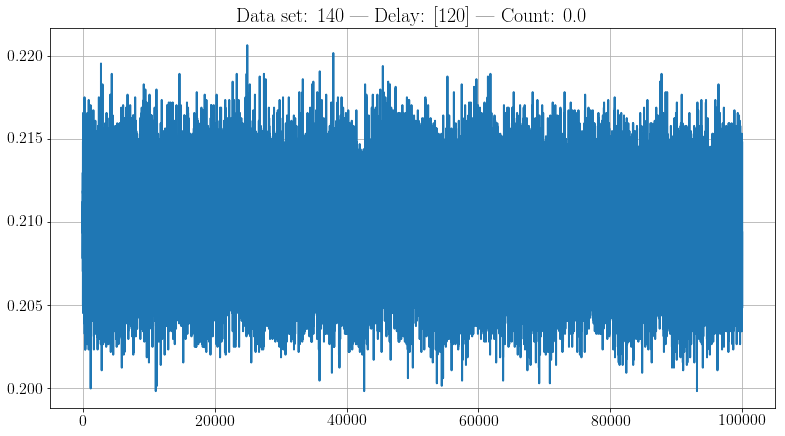

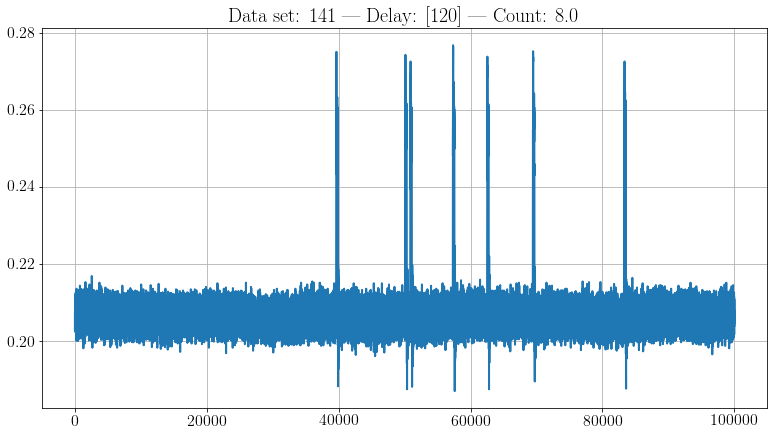

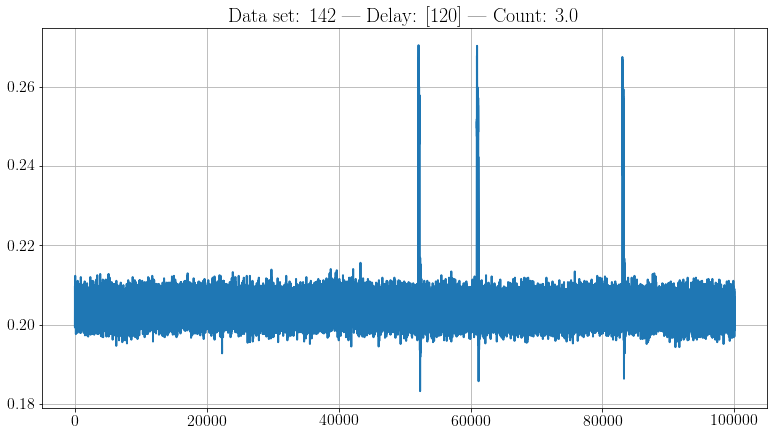

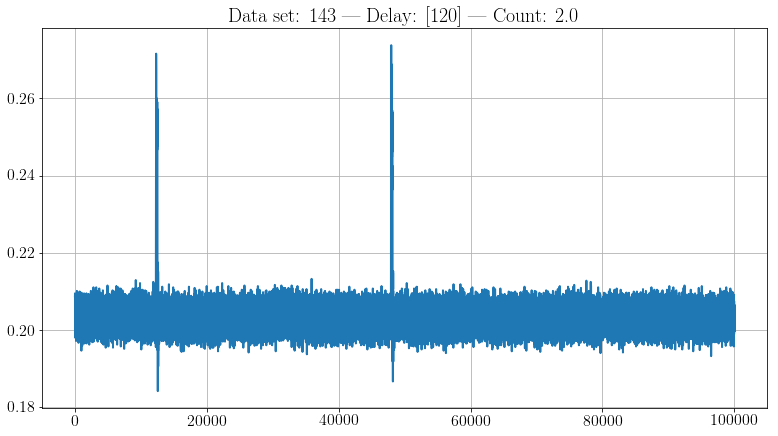

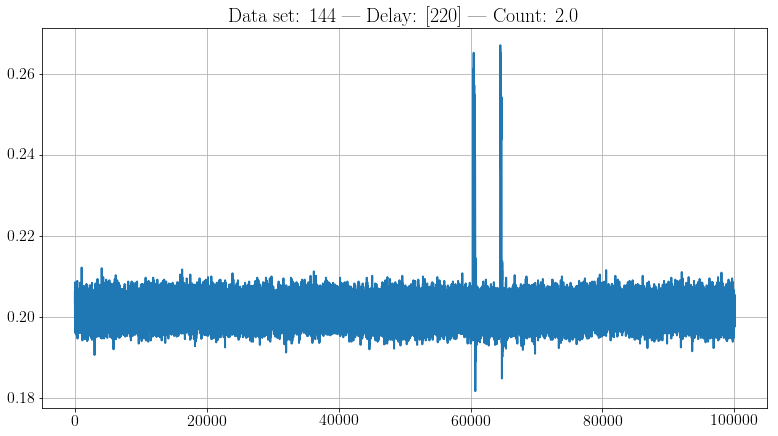

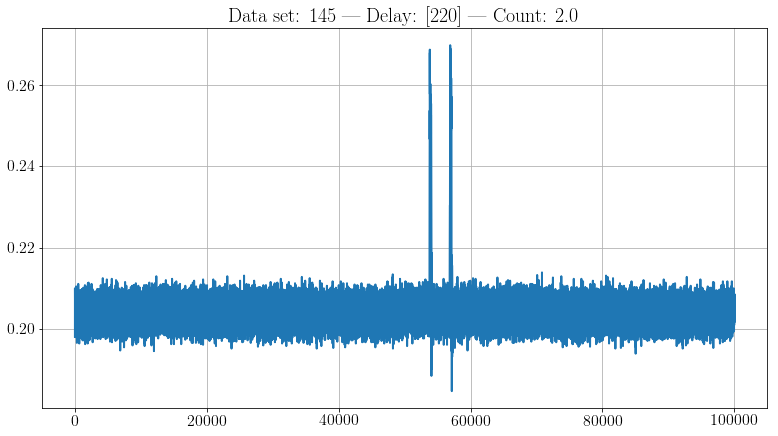

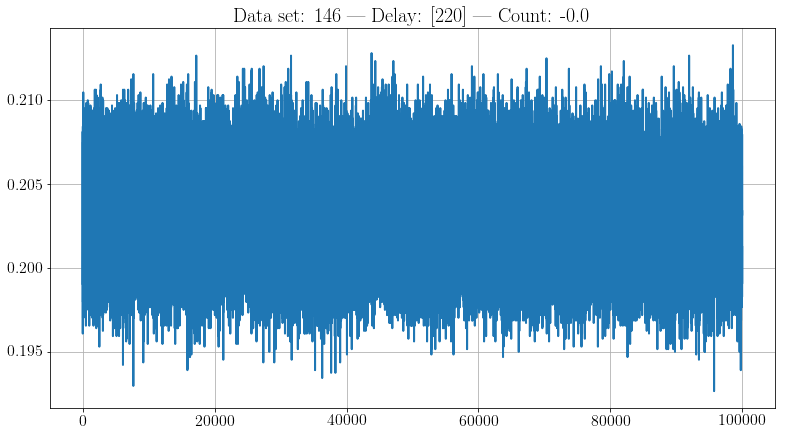

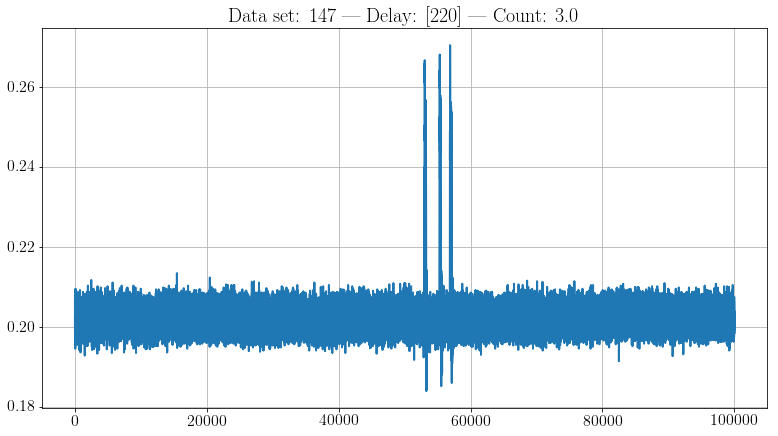

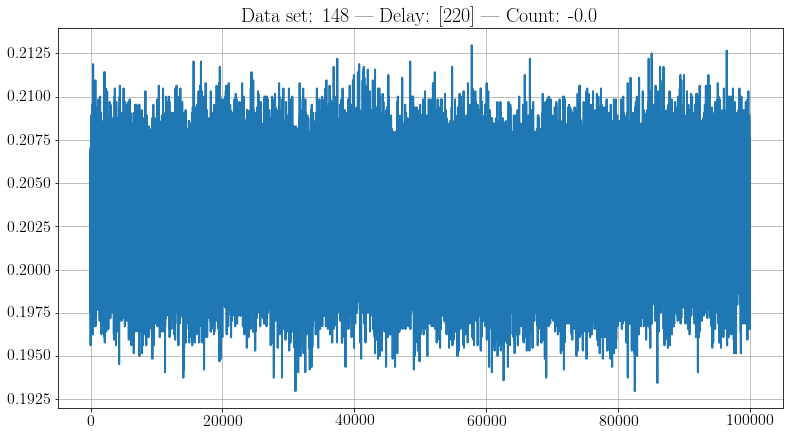

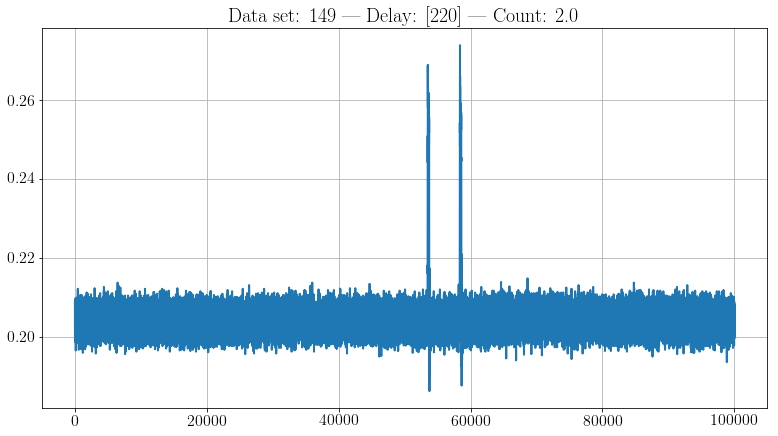

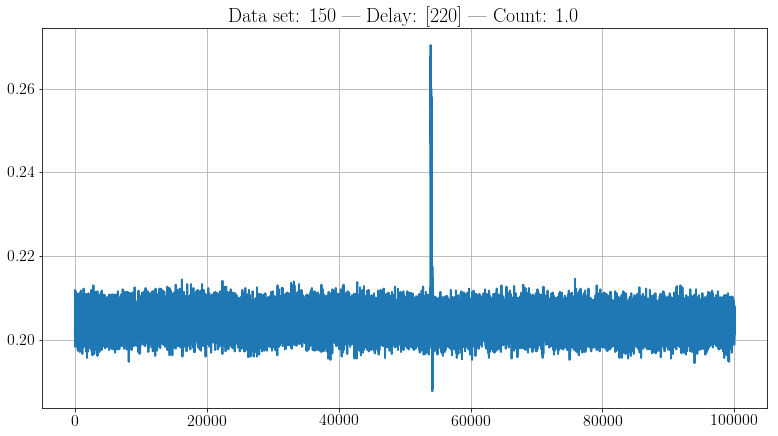

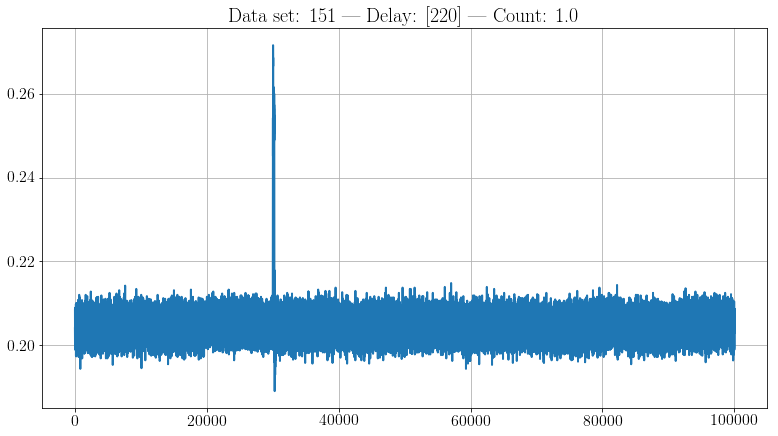

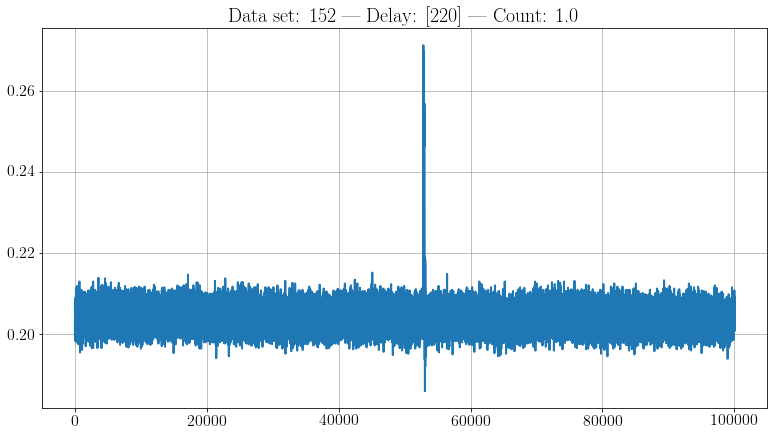

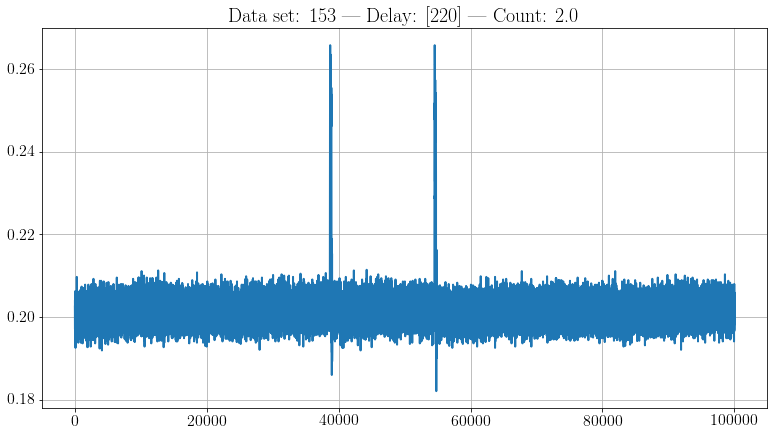

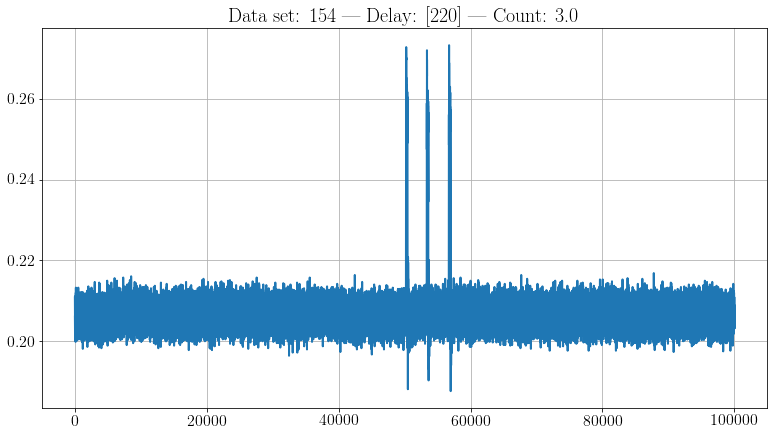

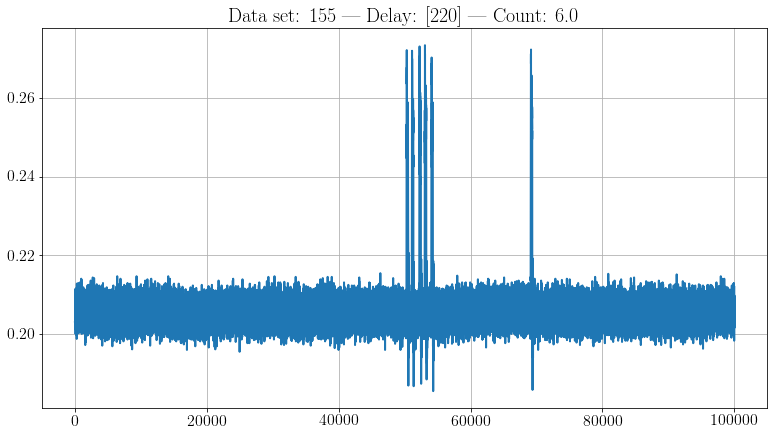

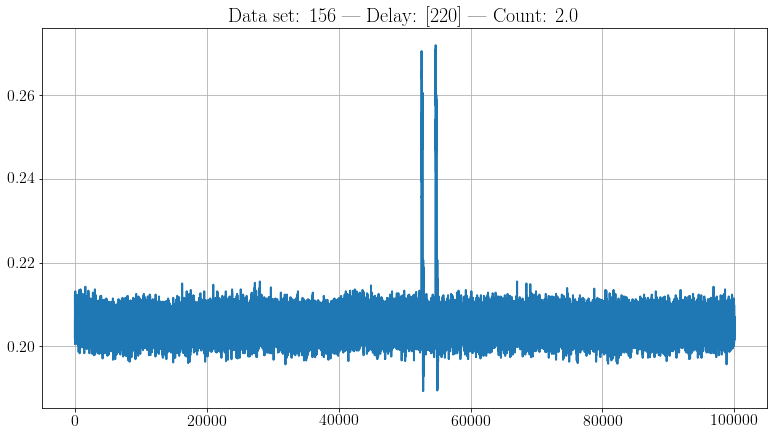

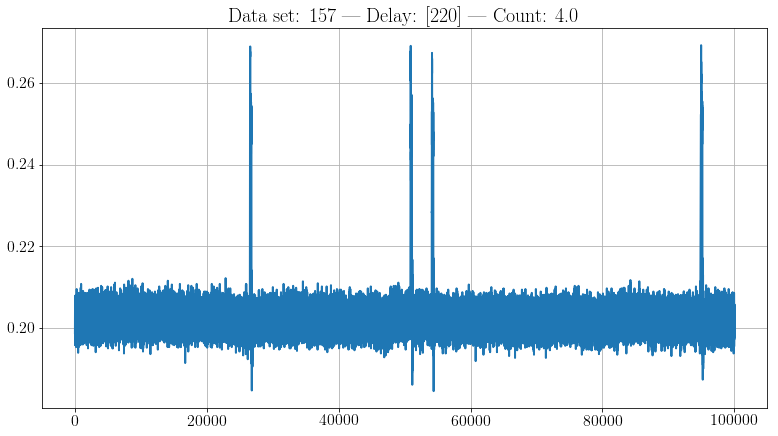

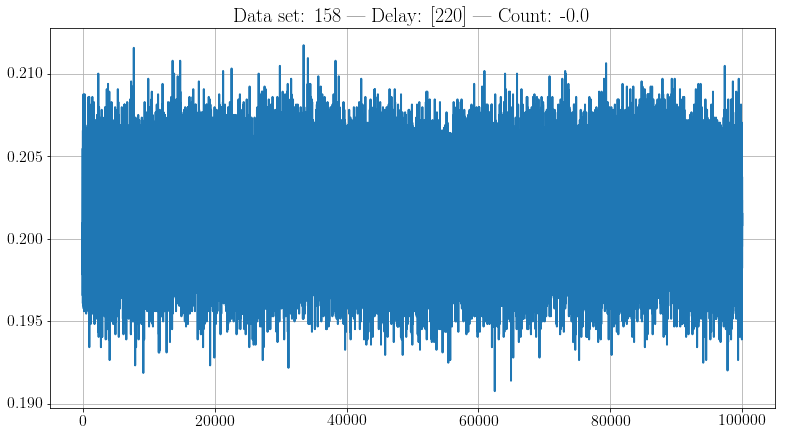

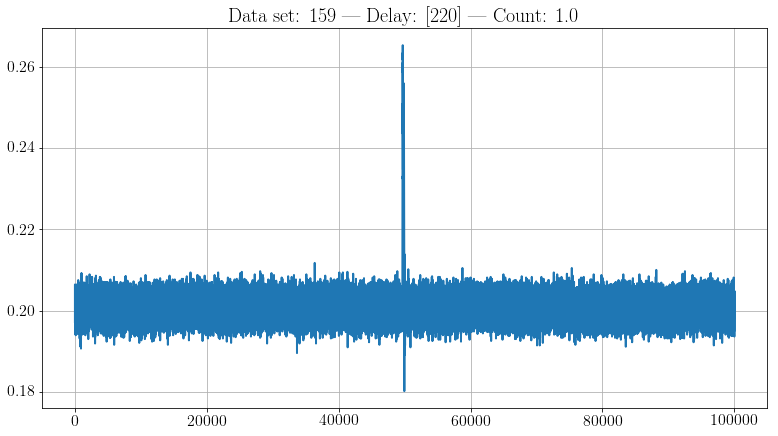

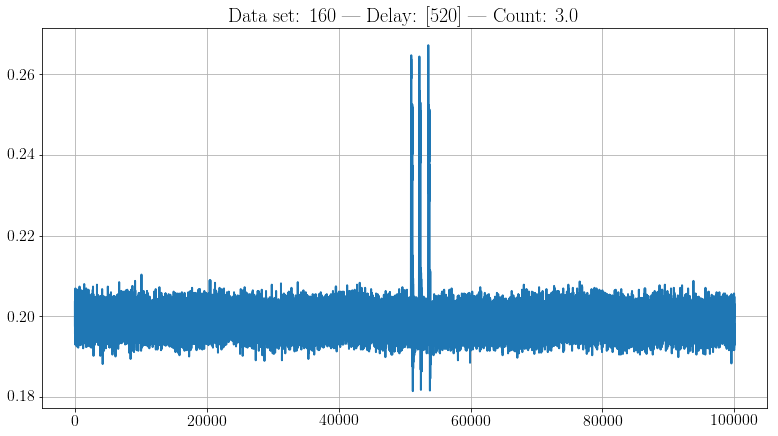

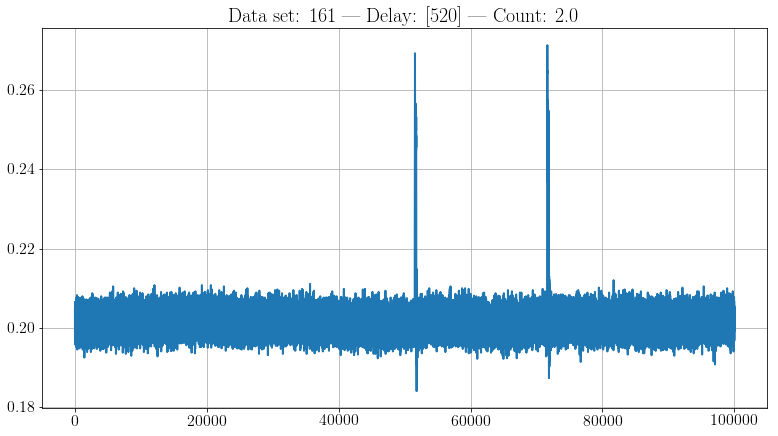

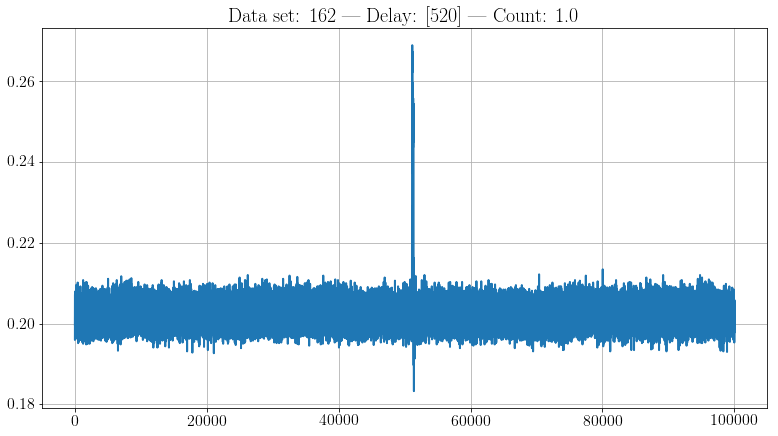

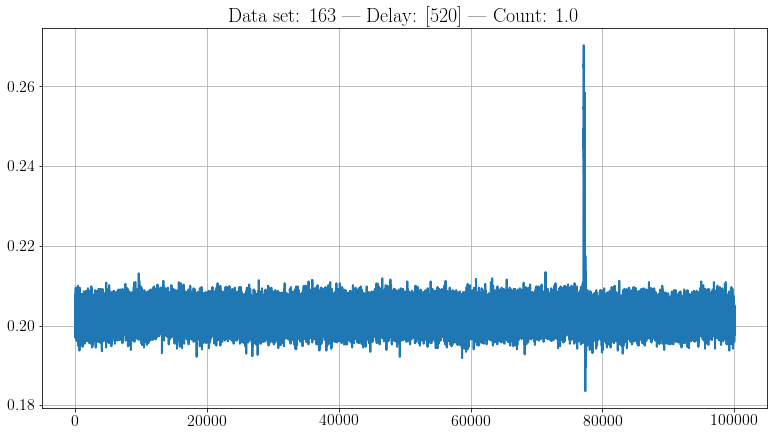

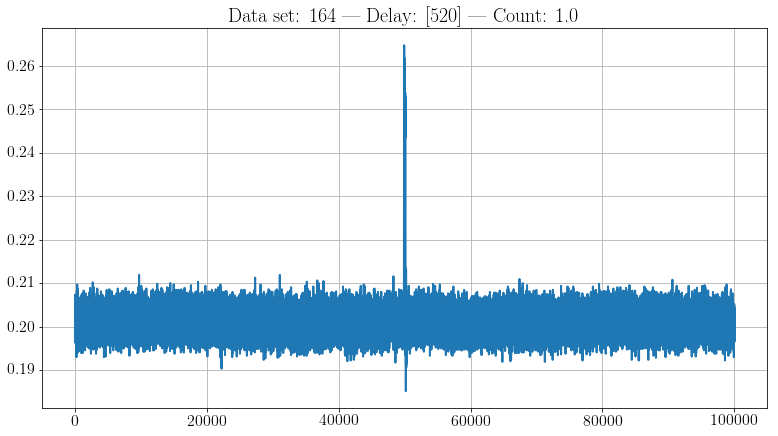

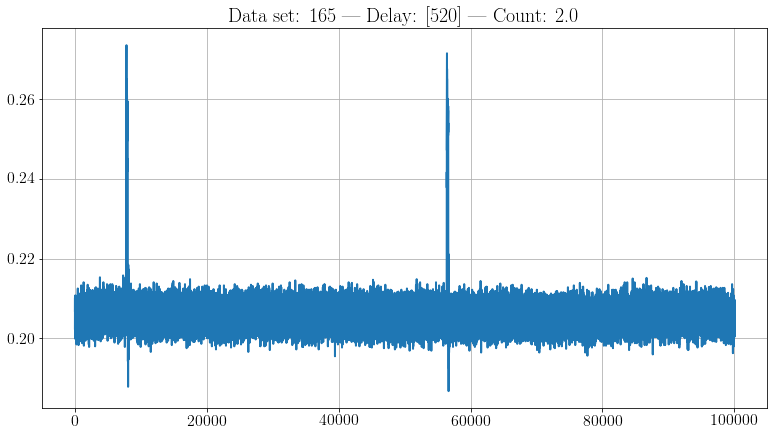

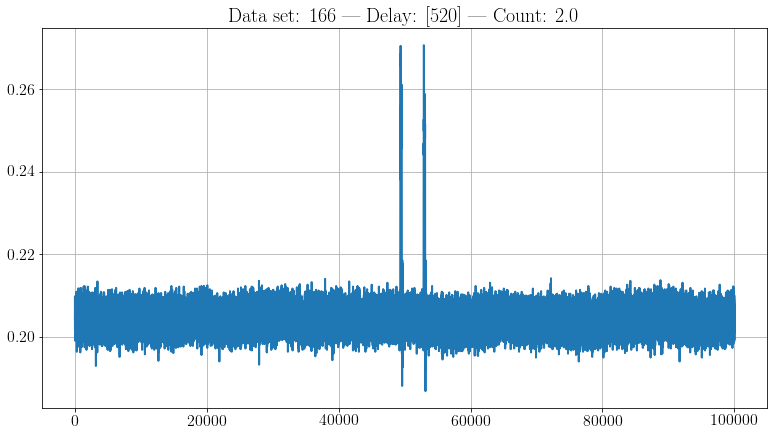

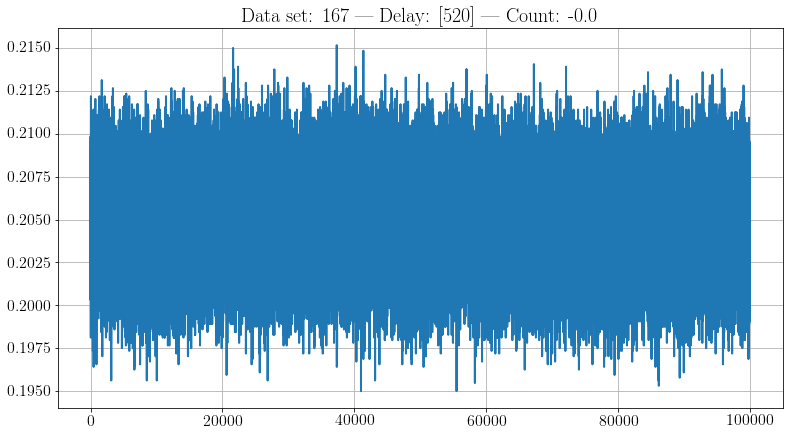

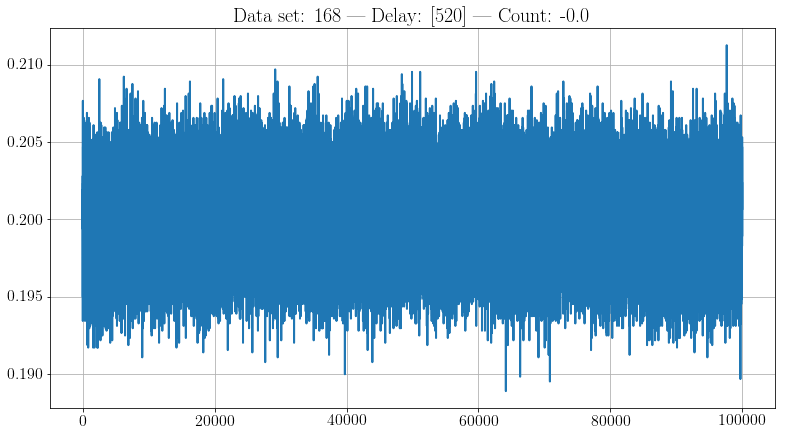

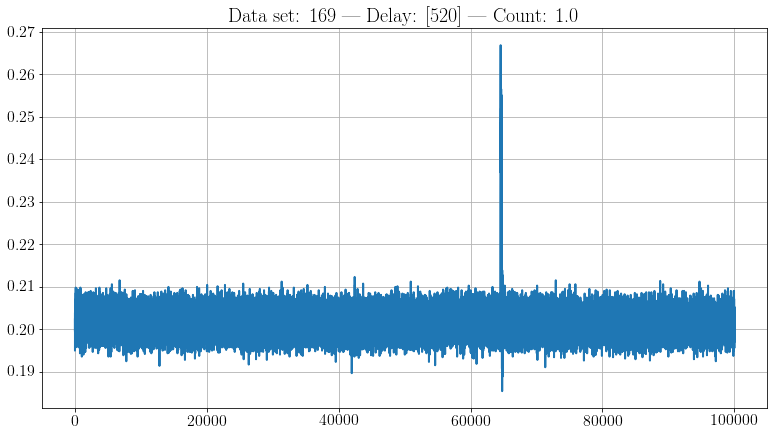

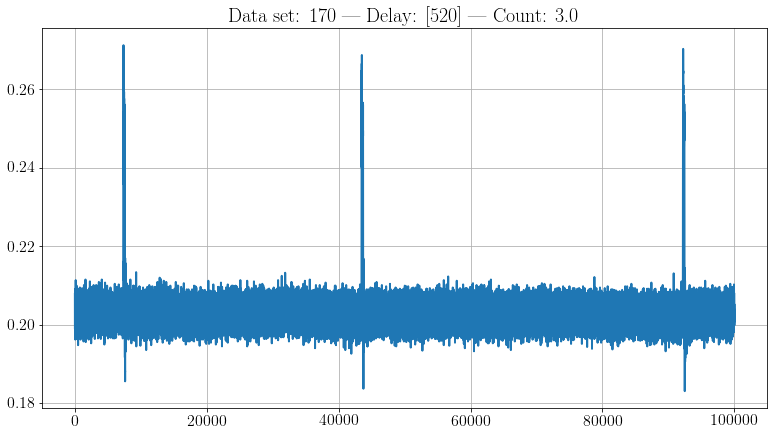

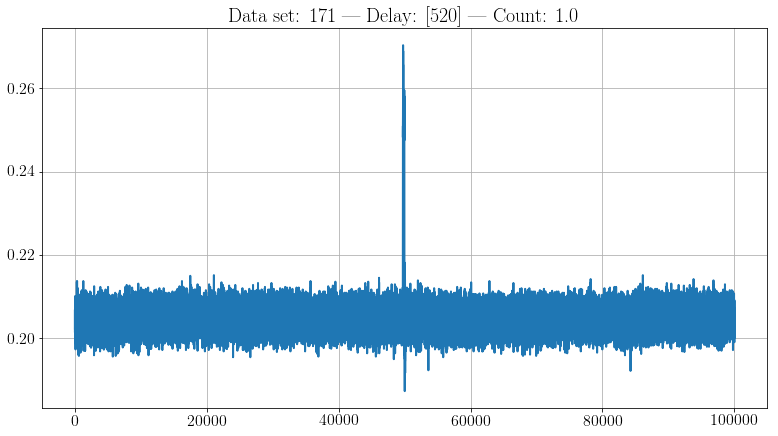

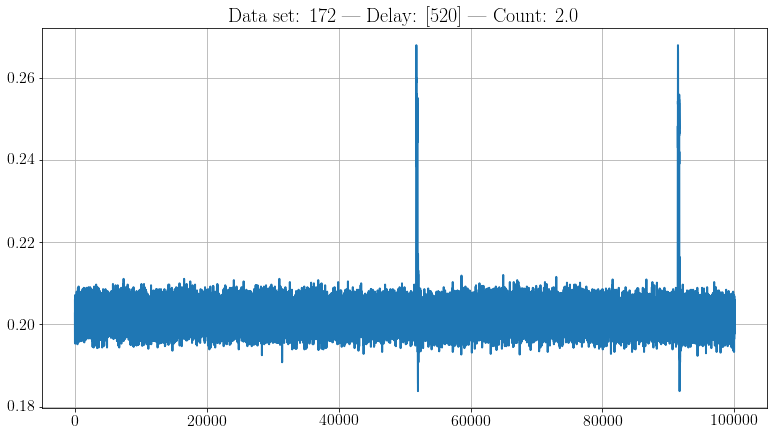

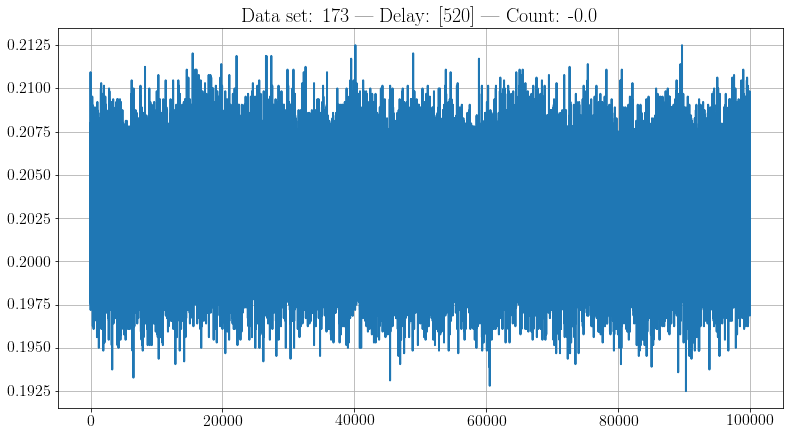

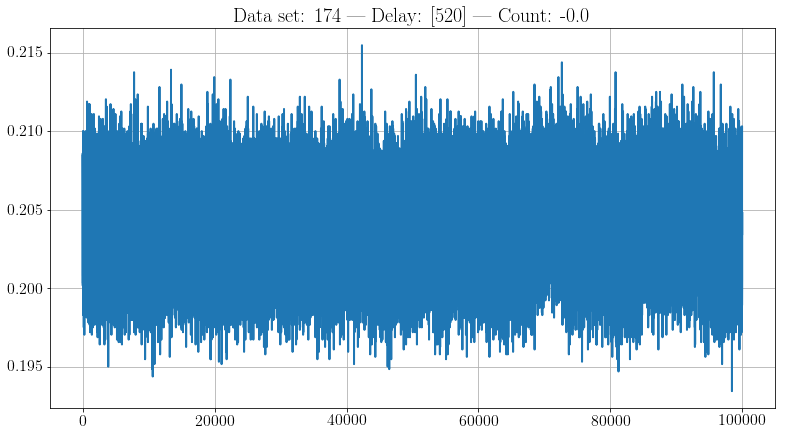

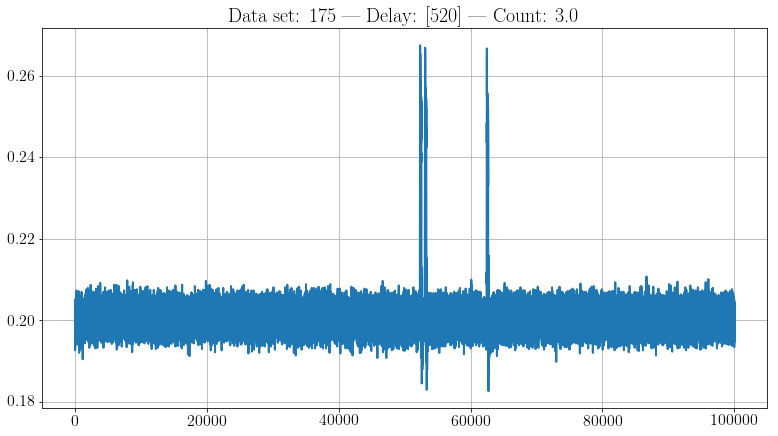

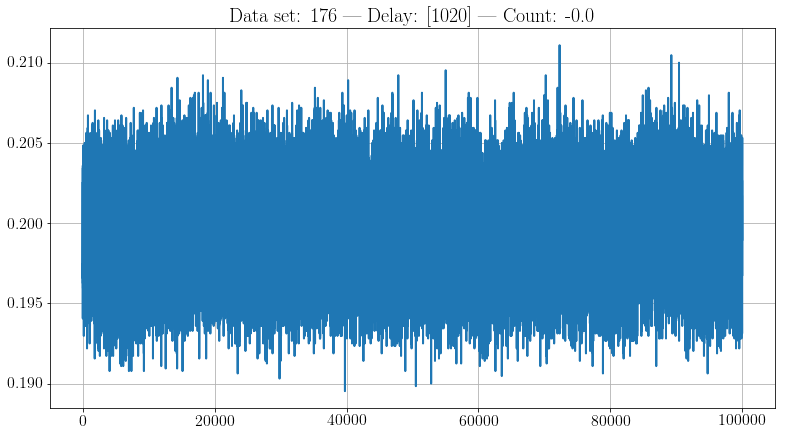

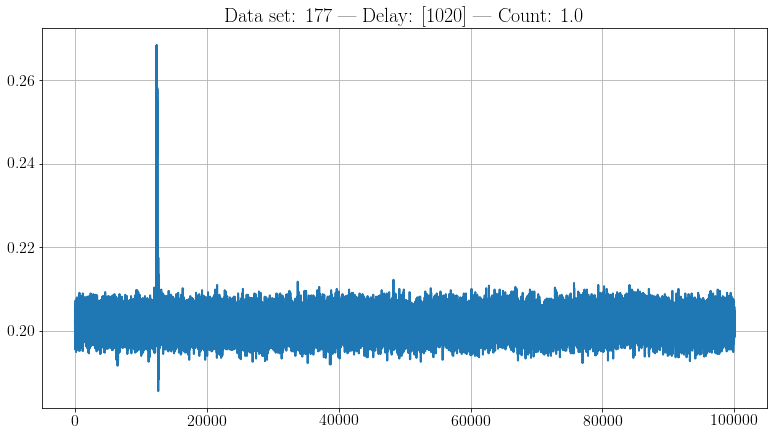

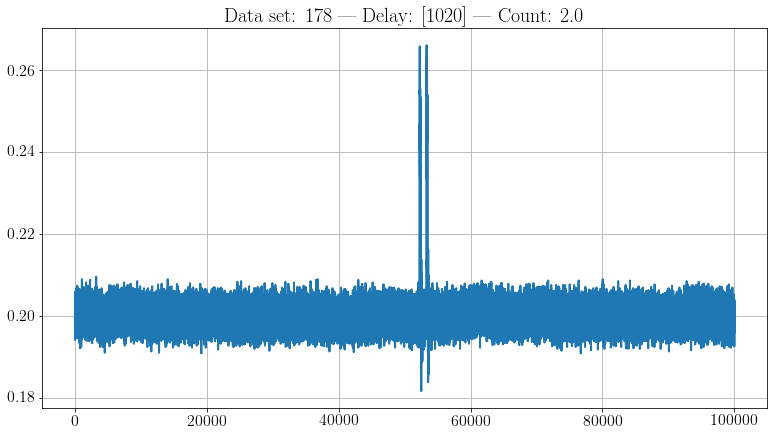

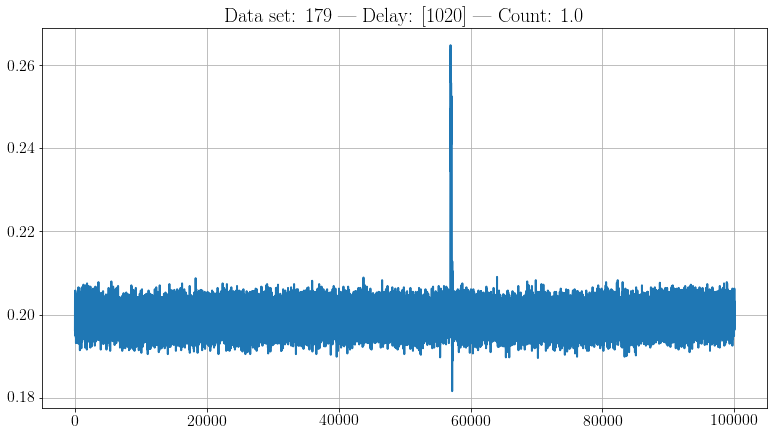

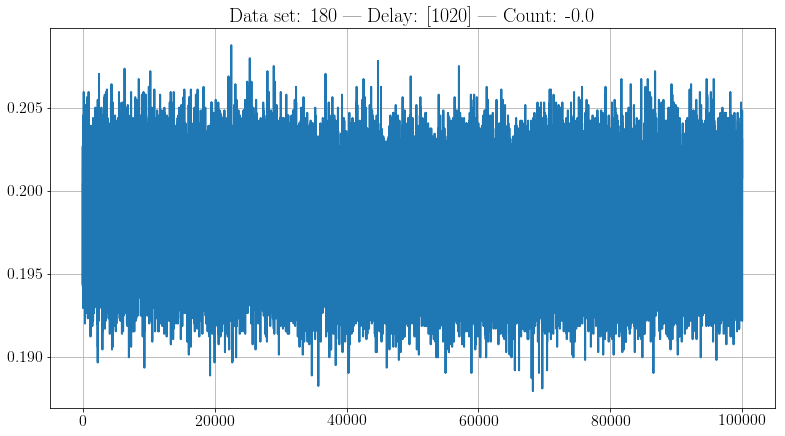

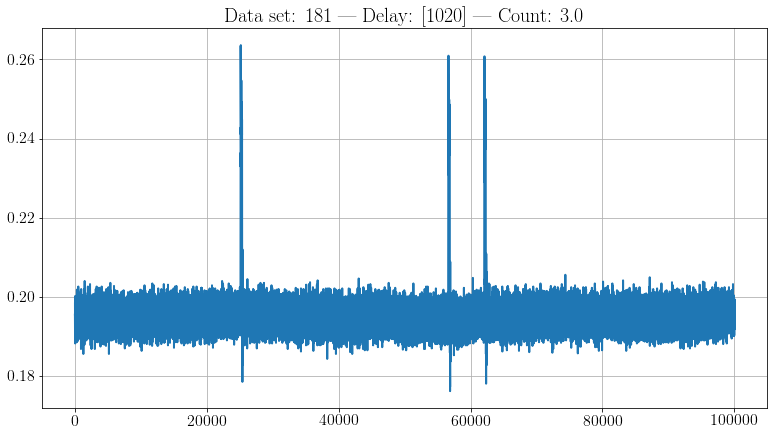

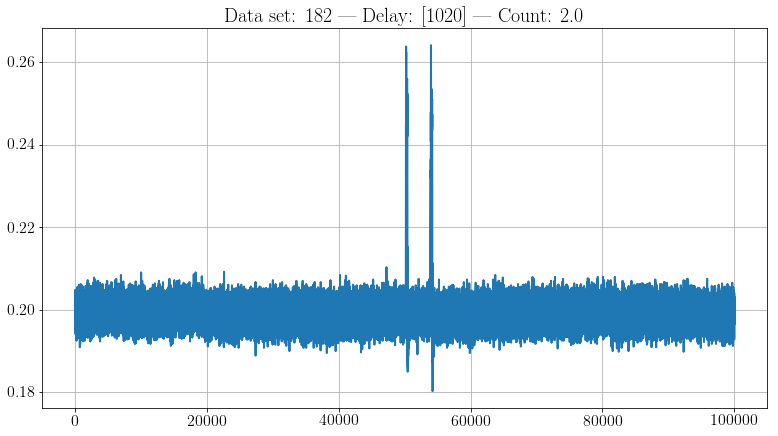

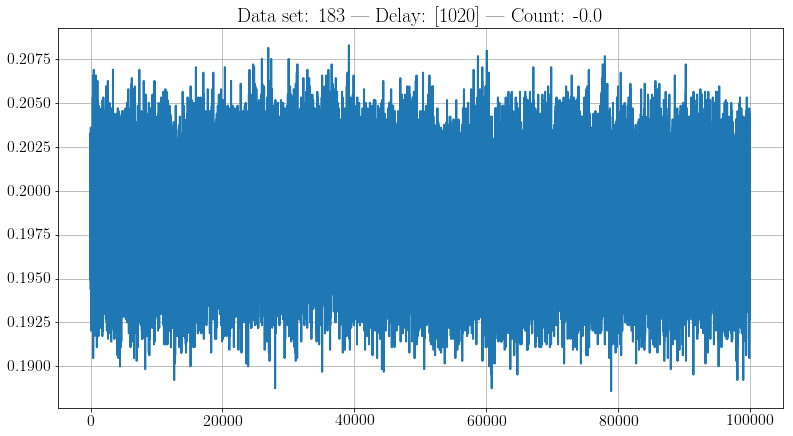

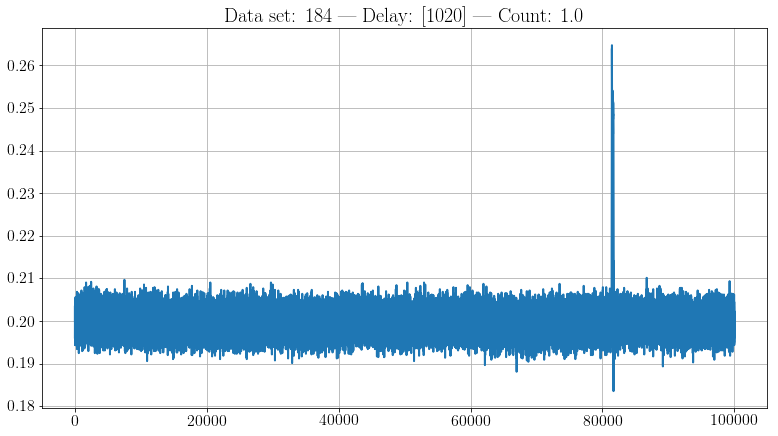

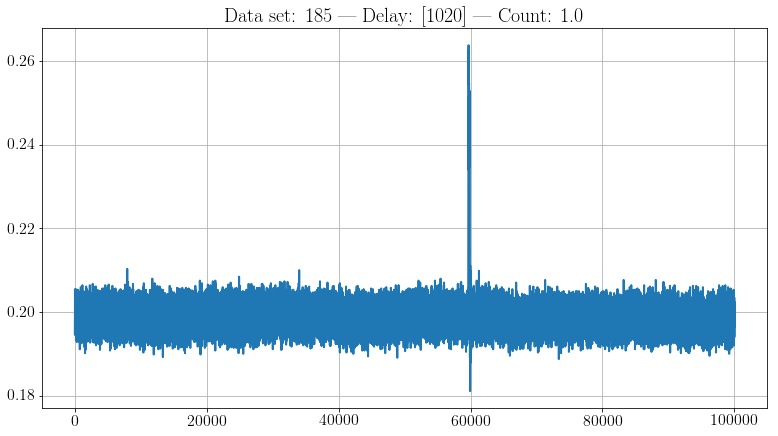

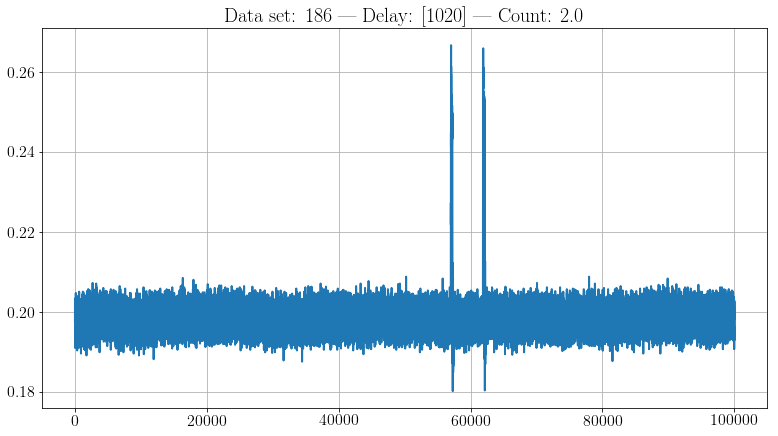

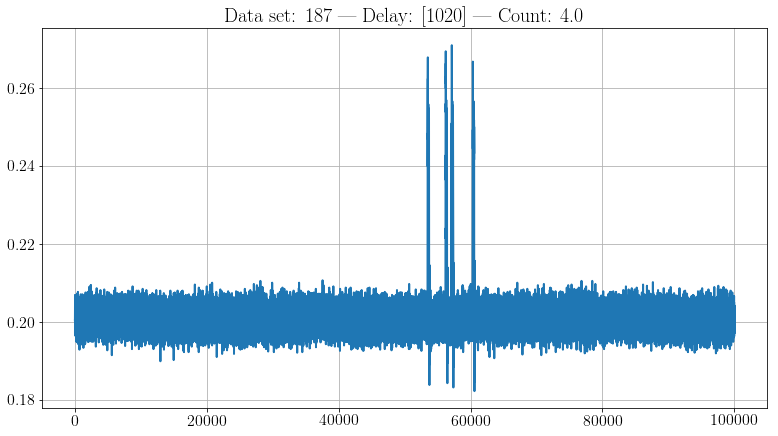

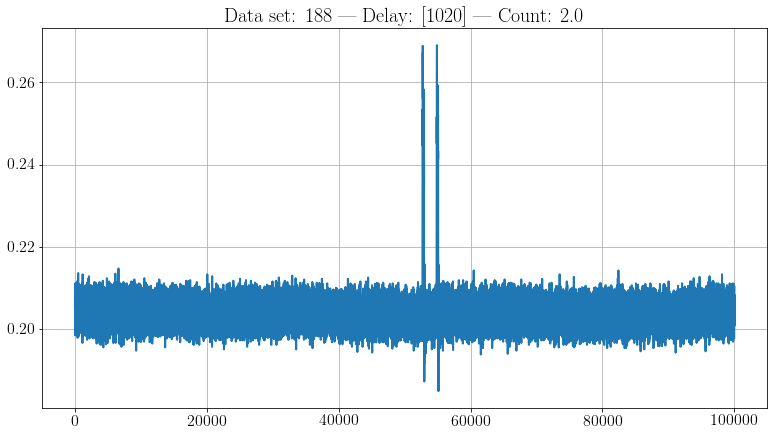

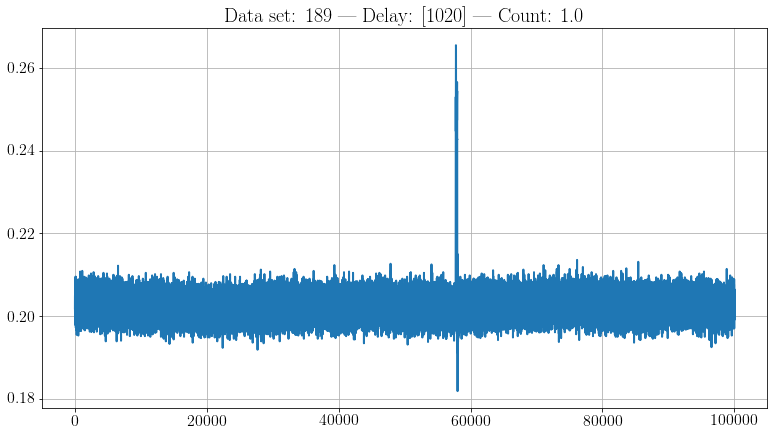

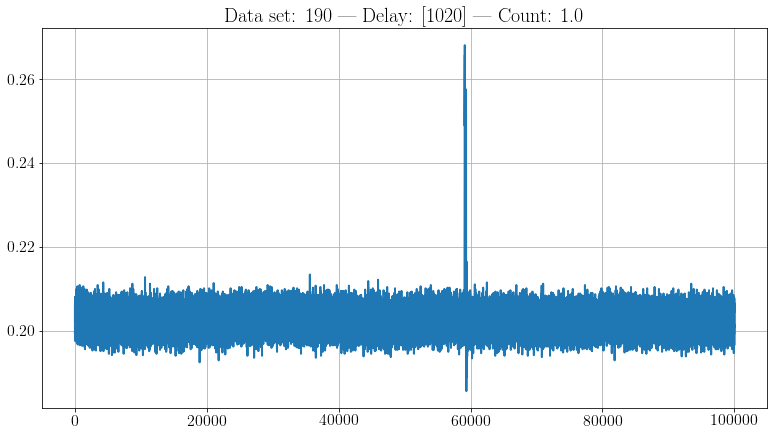

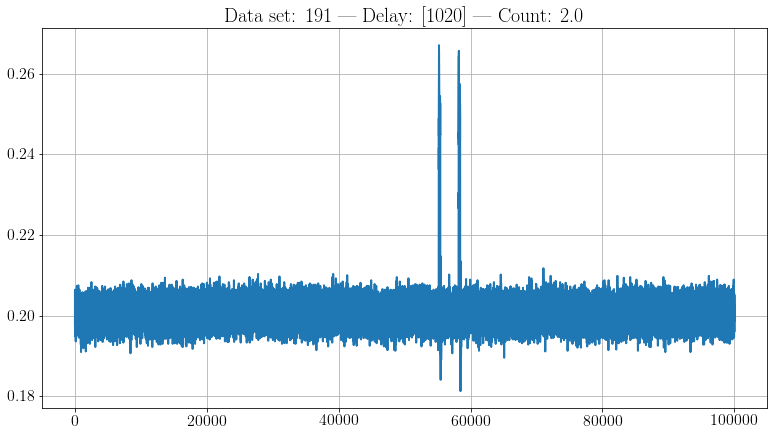

In [49]:
th1 = 0.22
th2 = 0.28

for i in range(len(T)):
    fig, ax = plt.subplots(figsize=(13, 7))
    y = data[i]['ch3']
    x = range(len(data[value]))
    ax.plot(x, y)
    ax.set_title(f'Data set: {i} | Delay: {index.iloc[i, 1:2].values} | Count: {T[i]}')
    ax.grid(True)
    plt.show()